Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

### Load Data from Github - John Hopkins Institute 

In [4]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [5]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.373100   
255                               NaN            Sierra Leone   8.460555   
256  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

## Get Population

In [6]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [7]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                         Recovered                  Canada   0.000000   
241                               NaN                    Laos  19.856270   
242                               NaN                   Libya  26.335100   
243                               NaN      West Bank and Gaza  31.952200   
244                               NaN           Guinea-Bissau  11.803700   
245                               NaN                    Mali  17.570692   
246                               NaN   Saint Kitts and Nevis  17.357822   
247             Northwest Territories                  Canada  64.825500   
248                             Yukon                  Canada  64.282300   
249                               NaN                  Kosovo  42.602636   
250                               NaN                   Burma  21.916200   
251                          Anguilla          United Kingdom  18.220600   
252            British Virgin Islands          United Kingdom  18.420700   
253          Turks and Caicos Islands          United Kingdom  21.694000   
254                               NaN              MS Zaandam   0.000000   
255                               NaN                Botswana -22.328500   
256                               NaN                 Burundi  -3.373100   
257                               NaN            Sierra Leone   8.460555   
258  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

In [8]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/1/20  \
185        0        0        0        0        0        0  ...     651   
186        0        0        0        0        0        0  ...    1007   
187        0        0        0        0        0        0  ...      12   
188        0        0        0        0        0        0  ...     744   
189        0        0        0        0        0        0  ...    1169   
190        0        0        0        0        0        0  ...       0   
191        0        0        0        0        0        0  ...       0   
192        0        0        0        0        0        0  ...       0   
193        0        0        0        0        0        0  ...      41   
194        0        0        0        0        0        0  ...     169   

     5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20   Population   \
185     664     678     698     716     733     755     776    37,980,000   
186    1023    1043    1063    1074    1089    1105    1114    10,290,000   
187      12      12      12      12      12      12      12     2,870,256   
188     771     790     818     841     864     888     923    19,530,000   
189    1222    1280    1356    1451    1537    1625    1723   144,500,000   
190       0       0       0       0       0       0       0           NaN   
191       0       0       0       0       0       0       0           NaN   
192       0       0       0       0       0       0       0           NaN   
193      41      41      41      41      41      41      41        33,916   
194     176     184     191     200     209     219     229    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 114 columns]

In [9]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/1/20  5/2/20  5/3/20  5/4/20  \
175        0        0        0        0  ...     495     750     750     816   
176        0        0        0        0  ...    4715    4817    5114    5635   
177        0        0        0        0  ...     622     641     641     641   
178        0        0        0        0  ...       0       0       0       8   
179        0        0        0        0  ...     115     119     126     130   
180        0        0        0        0  ...   11129   12434   13550   14427   
181        0        0        0        0  ...    1084    1124    1214    1315   
182        0        0        0        0  ...    3491    3762    3945    4095   
183        0        0        0        0  ...    1647    1671    1689    1712   
184        0        0        0        0  ...    1436    1534    1664    1810   

     5/5/20  5/6/20  5/7/20  5/8/20   Population                 region  
175     858     888     980    1025     4,636,000              Oman_nan  
176    5801    6464    6464    7530   197,000,000          Pakistan_nan  
177     823     859     886     886     4,299,739            Panama_nan  
178       8       8       8       8           NaN  Papua New Guinea_nan  
179     135     142     148     152     7,111,652          Paraguay_nan  
180   15413   17527   18388   19012    32,870,710              Peru_nan  
181    1408    1506    1618    1734   104,900,000       Philippines_nan  
182    4280    4655    4862    5184    37,980,000            Poland_nan  
183    1743    2076    2258    2422    10,290,000          Portugal_nan  
184    1924    2070    2286    2370     2,870,256             Qatar_nan  

[10 rows x 114 columns]

In [10]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/1/20  \
185        0        0        0        0        0        0  ...   13105   
186        0        0        0        0        0        0  ...   25351   
187        0        0        0        0        0        0  ...   14096   
188        0        0        0        0        0        0  ...   12567   
189        0        0        0        0        0        0  ...  114431   
190        0        0        0        0        0        0  ...     249   
191        0        0        0        0        0        0  ...      17   
192        0        0        0        0        0        0  ...      16   
193        0        0        0        0        0        0  ...     580   
194        0        0        0        0        0        0  ...   24097   

     5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20   Population   \
185   13375   13693   14006   14431   14740   15047   15366    37,980,000   
186   25190   25282   25524   25702   26182   26715   27268    10,290,000   
187   14872   15551   16191   17142   17972   18890   20201     2,870,256   
188   12732   13163   13512   13837   14107   14499   14811    19,530,000   
189  124054  134687  145268  155370  165929  177160  187859   144,500,000   
190     255     259     261     261     268     271     273           NaN   
191      17      18      18      18      18      18      18           NaN   
192      16      16      17      17      17      17      17           NaN   
193     580     582     582     589     608     622     623        33,916   
194   25459   27011   28656   30251   31938   33731   35432    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 114 columns]

In [11]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   5/1/20   5/2/20   5/3/20  \
220        0        0        0        0  ...       74       74       74   
221        0        0        0        0  ...      538      543      544   
222        0        0        0        0  ...      144      144      144   
223        0        0        0        0  ...      316      320      321   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   177454   182260   186599   
226        0        0        0        0  ...      648      652      655   
227        2        2        5        5  ...  1103461  1132539  1158040   
228        0        0        0        0  ...     2086     2118     2149   
229        0        0        0        0  ...      335      345      357   

      5/4/20   5/5/20   5/6/20   5/7/20   5/8/20   Population   \
220       75       78       78       80       81           NaN   
221      544      545      545      545      545       173,519   
222      144      144      144      144      146        33,693   
223      325      326      327      329      329        84,939   
224       11       11       11       11       11         4,991   
225   190584   194990   201101   206715   211364    66,440,000   
226      657      670      673      684      694     3,471,150   
227  1180375  1204351  1228603  1257023  1283929   327,200,000   
228     2189     2207     2233     2298     2325    33,363,556   
229      357      361      379      381      388           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 114 columns]

## Create Time Series + Plots

In [12]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [13]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [14]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

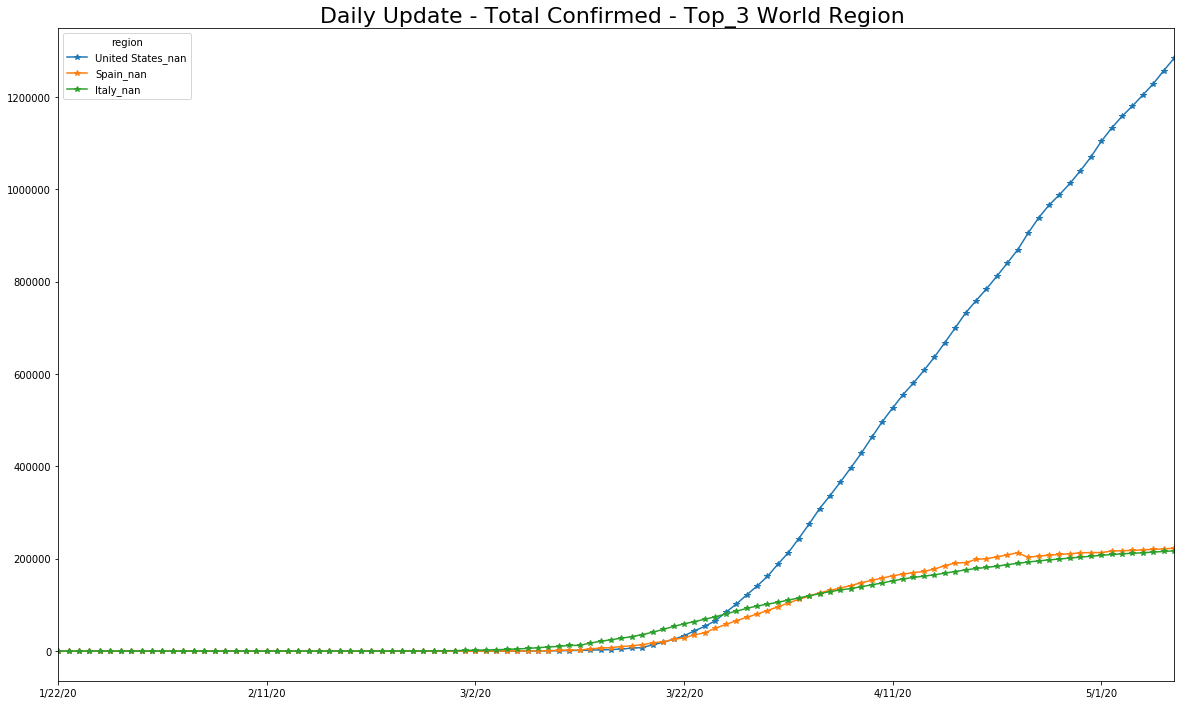

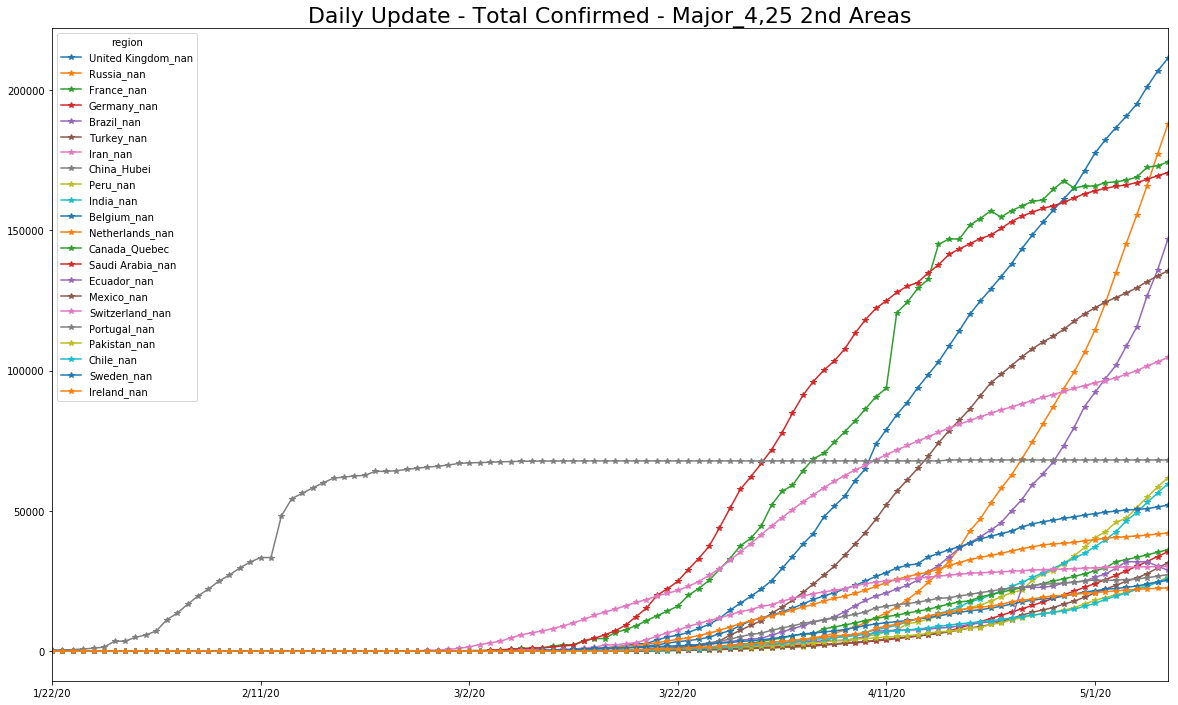

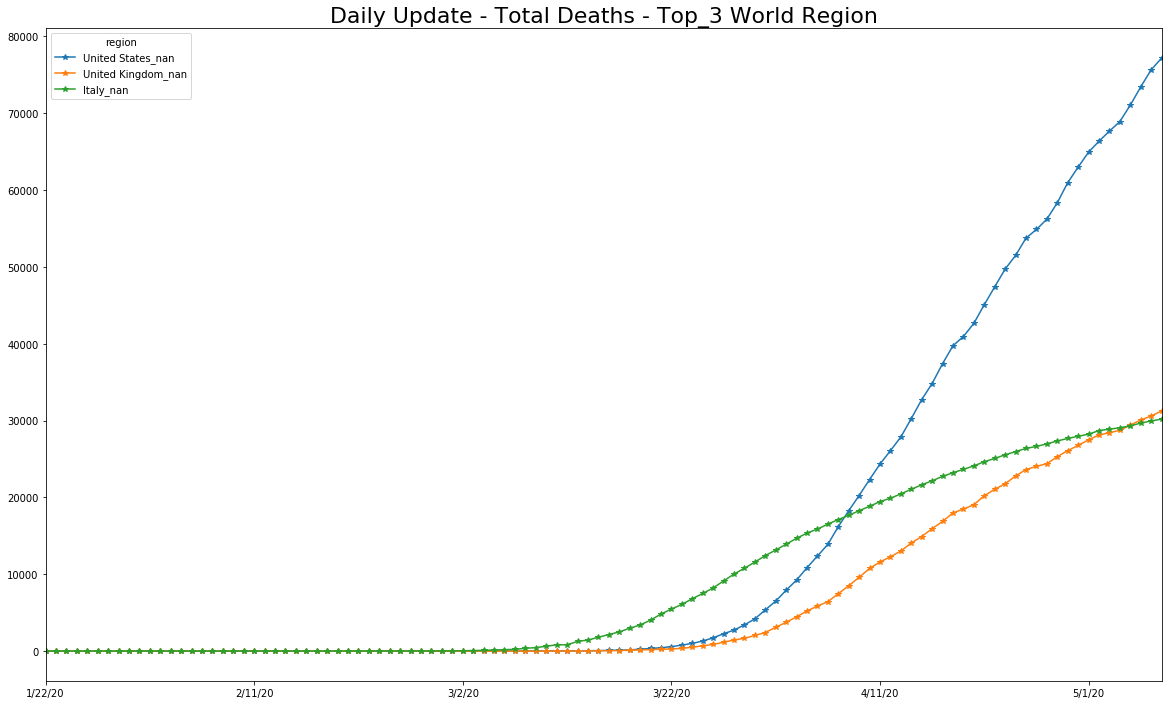

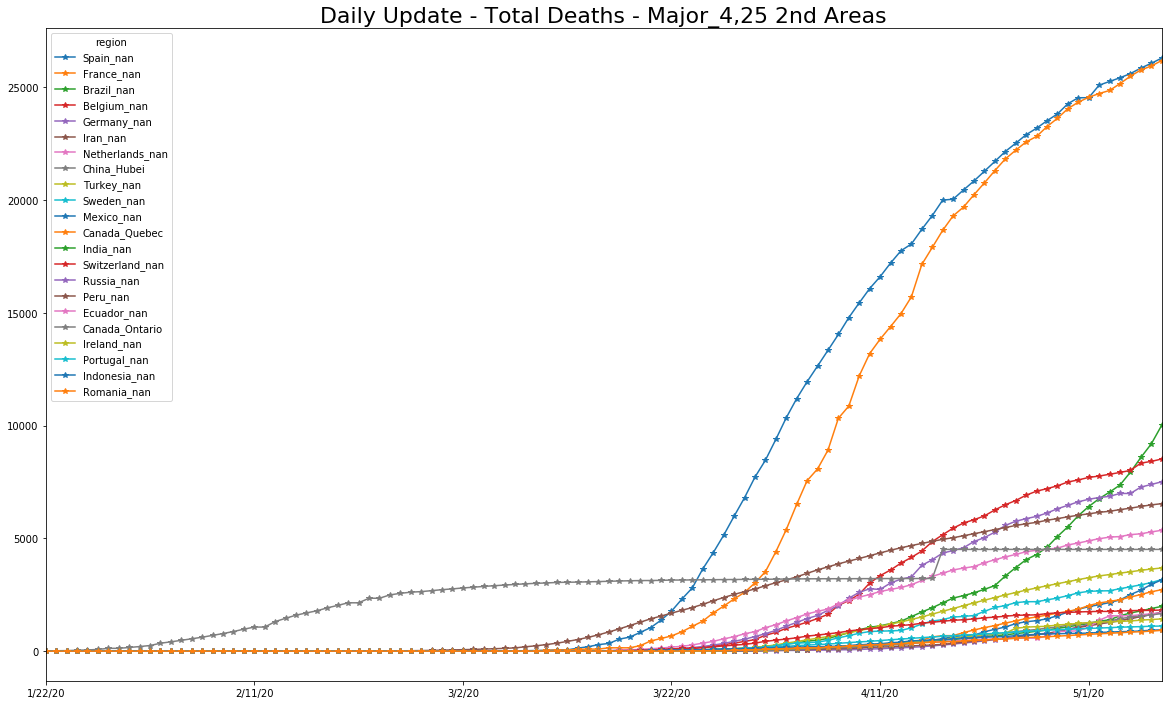

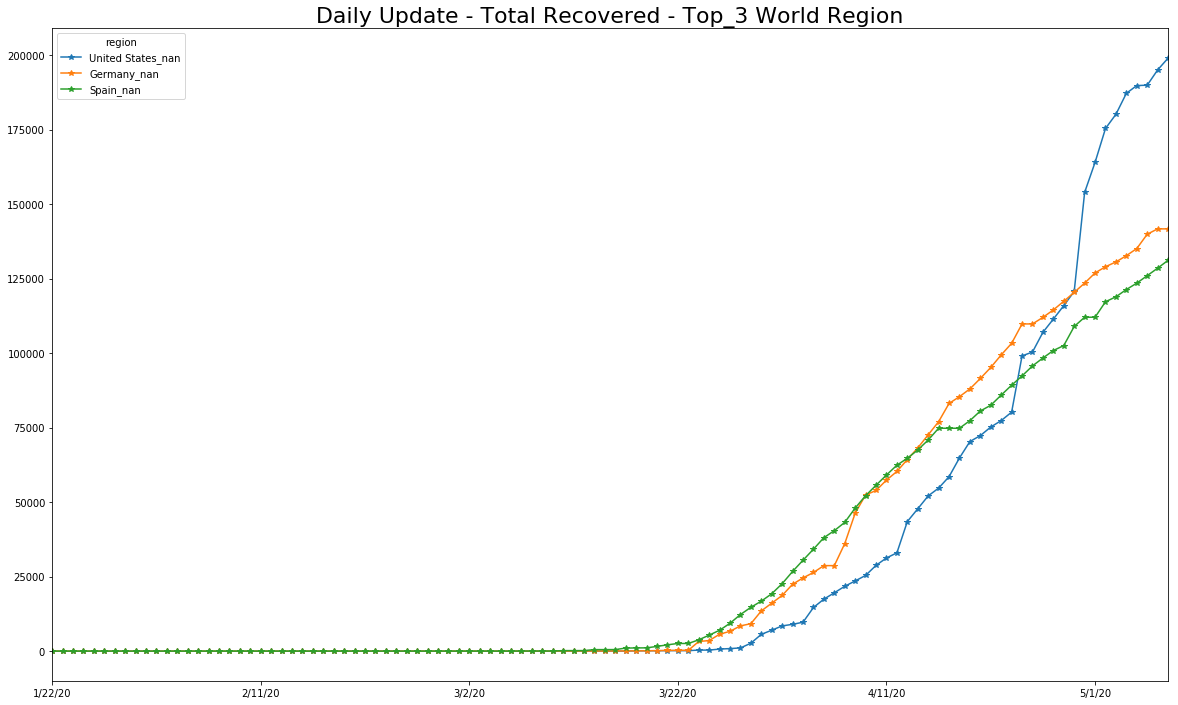

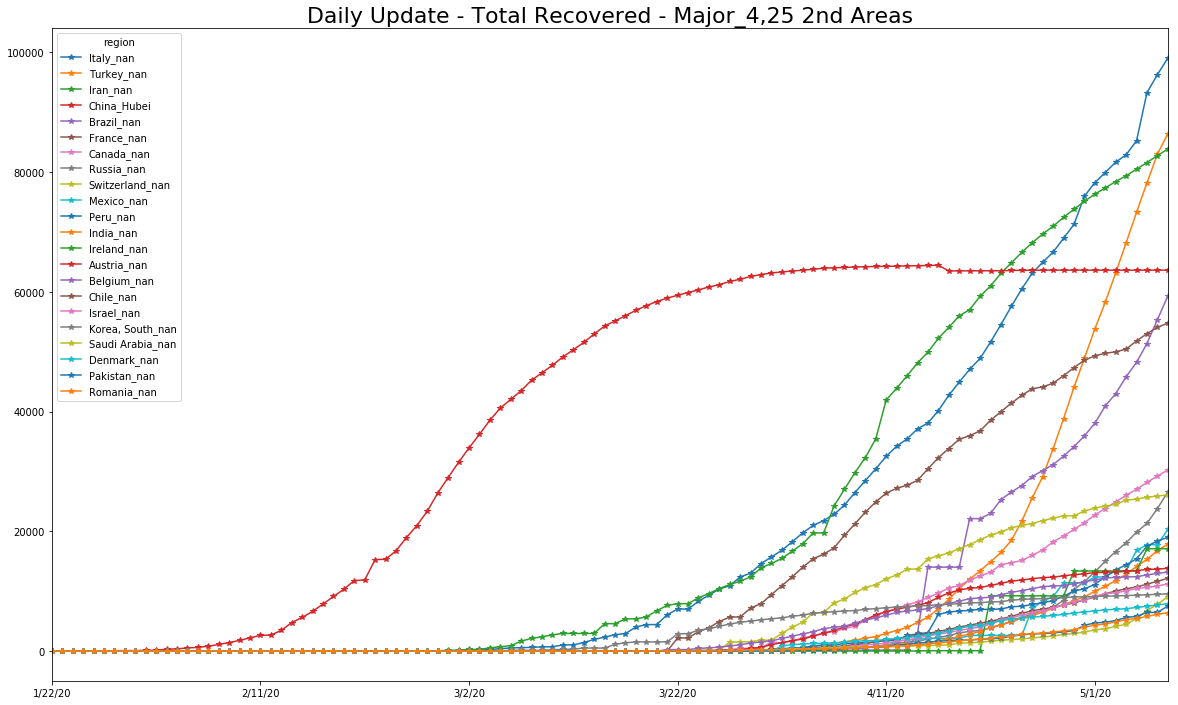

In [15]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [16]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [17]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [18]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/05/09


In [19]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [20]:
w[:]

date                     region   min   max
0   2020/05/10  Australia_New South Wales  17.7  25.2
1   2020/05/10                Belgium_nan   8.9  15.6
2   2020/05/10                 Brazil_nan  13.9  15.6
3   2020/05/10             Canada_Ontario  -5.4  -4.6
4   2020/05/10              Canada_Quebec  -1.0  -1.0
5   2020/05/10              China_Beijing  10.0  20.0
6   2020/05/10            China_Guangdong  28.6  33.0
7   2020/05/10            China_Hong Kong  24.4  26.1
8   2020/05/10                China_Hubei  17.0  22.0
9   2020/05/10                China_Macau  27.0  31.0
10  2020/05/10             China_Shanghai  20.8  23.7
11  2020/05/10                Finland_nan   2.2   3.9
12  2020/05/10                 France_nan  13.0  16.9
13  2020/05/10                Germany_nan   7.0  13.0
14  2020/05/10                  India_nan  26.0  36.0
15  2020/05/10                   Iran_nan   7.0  16.5
16  2020/05/10                  Italy_nan   9.9  16.3
17  2020/05/10                  Japan_nan   6.8  16.5
18  2020/05/10           Korea, South_nan  13.6  18.0
19  2020/05/10               Malaysia_nan  24.4  31.0
20  2020/05/10            Netherlands_nan  13.9  18.9
21  2020/05/10                 Norway_nan  -3.3  -1.7
22  2020/05/10            Philippines_nan  26.1  31.7
23  2020/05/10                 Poland_nan   4.4  14.4
24  2020/05/10               Portugal_nan  12.0  14.1
25  2020/05/10                 Russia_nan  -2.0  15.0
26  2020/05/10              Singapore_nan  28.0  33.0
27  2020/05/10                  Spain_nan  13.9  19.9
28  2020/05/10                 Sweden_nan   0.6   3.9
29  2020/05/10            Switzerland_nan  12.9  15.8
30  2020/05/10                Taiwan*_nan  23.1  34.0
31  2020/05/10                 Turkey_nan   6.9  12.7
32  2020/05/10         United Kingdom_nan   8.9  11.7
33  2020/05/10          United States_nan   5.8   7.3
34  2020/05/10                Vietnam_nan  26.9  33.0

## Kalman Filter With R

In [21]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

#ts=ts[29:]
#ts_d=ts_d[29:]
#ts_rec=ts_rec[29:]

In [22]:
ts[-4:-1]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
5/5/20             3224          820         4838          751          36   
5/6/20             3392          832         4997          751          36   
5/7/20             3563          842         5182          752          36   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
5/5/20                       25           5020         2619   
5/6/20                       25           5208         2782   
5/7/20                       25           5371         2884   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
5/5/20                                     107                       3042   
5/6/20                                     107                       3044   
5/7/20                                     107                       3047   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
5/5/20  ...            1204351          670            2207            361   
5/6/20  ...            1228603          673            2233            379   
5/7/20  ...            1257023          684            2298            381   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
5/5/20          271                     371                   6         22   
5/6/20          271                     374                   6         25   
5/7/20          288                     375                   6         25   

region  Zambia_nan  Zimbabwe_nan  
5/5/20         138            34  
5/6/20         146            34  
5/7/20         153            34  

[3 rows x 266 columns]

In [23]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [24]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [25]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [26]:
p=%R pred_all

In [27]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [28]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [29]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [30]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [31]:
w_in_model.tail(2)

date       region   min   max
6864 2020-05-09  Vietnam_nan  26.0  33.0
6865 2020-05-10  Vietnam_nan  26.9  33.0

### Build Train Set Data Structure

In [32]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [33]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [34]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
34    2020-02-25  Afghanistan_nan          1             1             1   
35    2020-02-26  Afghanistan_nan          1             0             1   
36    2020-02-27  Afghanistan_nan          1             0             1   
37    2020-02-28  Afghanistan_nan          1             0             0   
38    2020-02-29  Afghanistan_nan          1             0             0   
39    2020-03-01  Afghanistan_nan          1             0             0   
40    2020-03-02  Afghanistan_nan          1             0             0   
41    2020-03-03  Afghanistan_nan          1             0             0   
42    2020-03-04  Afghanistan_nan          1             0             0   
43    2020-03-05  Afghanistan_nan          1             0             0   
44    2020-03-06  Afghanistan_nan          1             0             0   
45    2020-03-07  Afghanistan_nan          1             0             0   
46    2020-03-08  Afghanistan_nan          4             0             0   
47    2020-03-09  Afghanistan_nan          4             3             3   
48    2020-03-10  Afghanistan_nan          5             0             3   
49    2020-03-11  Afghanistan_nan          7             1             4   
50    2020-03-12  Afghanistan_nan          7             2             3   
51    2020-03-13  Afghanistan_nan          7             0             3   
52    2020-03-14  Afghanistan_nan         11             0             2   
53    2020-03-15  Afghanistan_nan         16             4             4   
54    2020-03-16  Afghanistan_nan         21             5             9   
55    2020-03-17  Afghanistan_nan         22             5            14   
56    2020-03-18  Afghanistan_nan         22             1            11   
57    2020-03-19  Afghanistan_nan         22             0             6   
58    2020-03-20  Afghanistan_nan         24             0             1   
59    2020-03-21  Afghanistan_nan         24             2             2   
60    2020-03-22  Afghanistan_nan         40             0             2   
61    2020-03-23  Afghanistan_nan         40            16            18   
62    2020-03-24  Afghanistan_nan         74             0            16   
63    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
29182 2020-04-10     Zimbabwe_nan         13             0             1   
29183 2020-04-11     Zimbabwe_nan         14             2             2   
29184 2020-04-12     Zimbabwe_nan         14             1             3   
29185 2020-04-13     Zimbabwe_nan         17             0             3   
29186 2020-04-14     Zimbabwe_nan         17             3             4   
29187 2020-04-15     Zimbabwe_nan         23             0             3   
29188 2020-04-16     Zimbabwe_nan         23             6             9   
29189 2020-04-17     Zimbabwe_nan         24             0             6   
29190 2020-04-18     Zimbabwe_nan         25             1             7   
29191 2020-04-19     Zimbabwe_nan         25             1             2   
29192 2020-04-20     Zimbabwe_nan         25             0             2   
29193 2020-04-21     Zimbabwe_nan         28             0             1   
29194 2020-04-22     Zimbabwe_nan         28             3             3   
29195 2020-04-23     Zimbabwe_nan         28             0             3   
29196 2020-04-24     Zimbabwe_nan         29             0             3   
29197 2020-04-25     Zimbabwe_nan         31             1             1   
29198 2020-04-26     Zimbabwe_nan         31             2             3   
29199 2020-04-27     Zimbabwe_nan         32             0             3   
29200 2020-04-28     Zimbabwe_nan         32             1             3   
29201 2020-04-29     Zimbabwe_nan         32             0             1   
29202 2020-04-30     Zimbabwe_nan         40             0  

In [35]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [36]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
29211 2020-05-09  Zimbabwe_nan          0             0             0   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
29211            -6         100.029412         100.029412             85.025   

       last_day  kalman_prediction  population  infected_rate  min  max  
29211        34               33.0    10000000   3.500000e-08  NaN  NaN

In [37]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage_factor_9.8_10_infected_rate_confirmed']=ratiod['infected_rate']*100*9.8
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
29209  2020-05-07  Zimbabwe_nan         34             0             0   
29210  2020-05-08  Zimbabwe_nan         34             0             0   
29211  2020-05-09  Zimbabwe_nan          0             0             0   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
29209             2         100.029412         100.029412          106.28125   
29210            -6         100.029412         100.029412           85.02500   
29211            -6         100.029412         100.029412           85.02500   

       last_day  kalman_prediction  population  infected_rate  min  max  \
29209        34               34.0    10000000   3.500000e-08  NaN  NaN   
29210        34               34.0    10000000   3.500000e-08  NaN  NaN   
29211        34               33.0    10000000   3.500000e-08  NaN  NaN   

       population_percentage_infected_rate_confirmed  \
29209                                       0.000003   
29210                                       0.000003   
29211                                       0.000003   

       population_percentage_factor_9.8_10_infected_rate_confirmed  \
29209                                           0.000034             
29210                                           0.000034             
29211                                           0.000034             

       delta_new_cases  delta_new_cases_per_1M_hab  
29209              0.0                         0.0  
29210              0.0                         0.0  
29211             -1.0                        -0.1

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  1.589653e+10  126081.435665  15243.185185


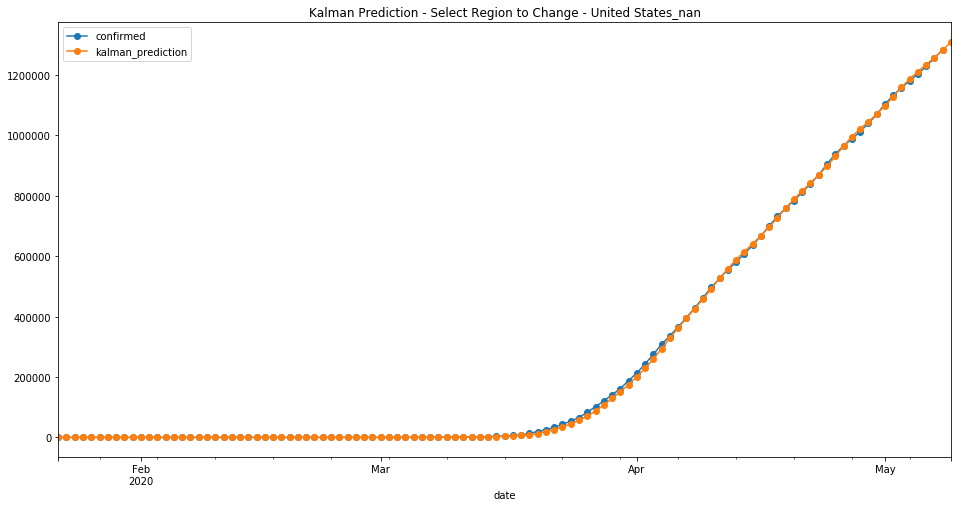

In [38]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [39]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphfjqrigp
  JVM stdout: /tmp/tmphfjqrigp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphfjqrigp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 6 months and 12 days !!!
H2O cluster name:           H2O_from_python_unknownUser_by81m9
H2O cluster total nodes:    1
H2O cluster free memory:    3 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [40]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-42)).strftime('%Y-%m-%d')
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-03-28
last_train_date= 2020-05-08
first_bootstrap_date= 2020-04-30
boost_bootstrap_date= 2020-05-05
first_test_date= 2020-04-29
last_test_date= 2020-05-09
first_valid_date= 2020-05-07


In [41]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [42]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [43]:
pred2.iloc[:25]

0  confirmed       date           region
0   2085.0       2171 2020-04-30  Afghanistan_nan
1   2368.0       2335 2020-05-01  Afghanistan_nan
2   2538.0       2469 2020-05-02  Afghanistan_nan
3   2642.0       2704 2020-05-03  Afghanistan_nan
4   2939.0       2894 2020-05-04  Afghanistan_nan
5   3116.0       3224 2020-05-05  Afghanistan_nan
6   3508.0       3392 2020-05-06  Afghanistan_nan
7   3656.0       3563 2020-05-07  Afghanistan_nan
8   3767.0       3778 2020-05-08  Afghanistan_nan
9   4013.0          0 2020-05-09  Afghanistan_nan
10   783.0        773 2020-04-30      Albania_nan
11   782.0        782 2020-05-01      Albania_nan
12   792.0        789 2020-05-02      Albania_nan
13   794.0        795 2020-05-03      Albania_nan
14   800.0        803 2020-05-04      Albania_nan
15   810.0        820 2020-05-05      Albania_nan
16   831.0        832 2020-05-06      Albania_nan
17   842.0        842 2020-05-07      Albania_nan
18   851.0        850 2020-05-08      Albania_nan
19   858.0          0 2020-05-09      Albania_nan
20  4046.0       4006 2020-04-30      Algeria_nan
21  4208.0       4154 2020-05-01      Algeria_nan
22  4342.0       4295 2020-05-02      Algeria_nan
23  4478.0       4474 2020-05-03      Algeria_nan
24  4675.0       4648 2020-05-04      Algeria_nan

In [44]:
pred2.iloc[175:195]

0  confirmed       date          region
175  2031.0       2060 2020-05-05  Azerbaijan_nan
176  2121.0       2127 2020-05-06  Azerbaijan_nan
177  2188.0       2204 2020-05-07  Azerbaijan_nan
178  2271.0       2279 2020-05-08  Azerbaijan_nan
179  2346.0          0 2020-05-09  Azerbaijan_nan
180    81.0         81 2020-04-30     Bahamas_nan
181    81.0         81 2020-05-01     Bahamas_nan
182    82.0         83 2020-05-02     Bahamas_nan
183    83.0         83 2020-05-03     Bahamas_nan
184    83.0         83 2020-05-04     Bahamas_nan
185    83.0         89 2020-05-05     Bahamas_nan
186    92.0         92 2020-05-06     Bahamas_nan
187    96.0         92 2020-05-07     Bahamas_nan
188    93.0         92 2020-05-08     Bahamas_nan
189    92.0          0 2020-05-09     Bahamas_nan
190  3098.0       3040 2020-04-30     Bahrain_nan
191  3200.0       3170 2020-05-01     Bahrain_nan
192  3270.0       3284 2020-05-02     Bahrain_nan
193  3397.0       3383 2020-05-03     Bahrain_nan
194  3506.0       3533 2020-05-04     Bahrain_nan

In [45]:
pred2.iloc[220:240]

0  confirmed       date       region
220  14131.0      14027 2020-04-30  Belarus_nan
221  14932.0      14917 2020-05-01  Belarus_nan
222  15827.0      15828 2020-05-02  Belarus_nan
223  16757.0      16705 2020-05-03  Belarus_nan
224  17610.0      17489 2020-05-04  Belarus_nan
225  18360.0      18350 2020-05-05  Belarus_nan
226  19220.0      19255 2020-05-06  Belarus_nan
227  20130.0      20168 2020-05-07  Belarus_nan
228  21072.0      21101 2020-05-08  Belarus_nan
229  22019.0          0 2020-05-09  Belarus_nan
230  48550.0      48519 2020-04-30  Belgium_nan
231  49281.0      49032 2020-05-01  Belgium_nan
232  49567.0      49517 2020-05-02  Belgium_nan
233  49941.0      49906 2020-05-03  Belgium_nan
234  50286.0      50267 2020-05-04  Belgium_nan
235  50650.0      50509 2020-05-05  Belgium_nan
236  50831.0      50781 2020-05-06  Belgium_nan
237  51084.0      51420 2020-05-07  Belgium_nan
238  51851.0      52011 2020-05-08  Belgium_nan
239  52517.0          0 2020-05-09  Belgium_nan

In [46]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [47]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  3746975.684370415
# MSE on the validation data =  14090139126.037485
# R^2 on the training data =  0.9997006358039974
# R^2 on the validation data 0.5668733695813717


In [48]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1589004755762_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3746975.684370415
RMSE: 1935.7106406615671
MAE: 308.9265257389554
RMSLE: 0.1996976717782029
Mean Residual Deviance: 3746975.684370415

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 14090139126.037485
RMSE: 118701.89183849382
MAE: 32036.998877119117
RMSLE: 5.792317618067042
Mean Residual Deviance: 14090139126.037485
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-05-09 06:12:41  0.070 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-05-09 06:12:42  0.336 sec   1.0                5405.900129181503   902.0636884753766   29223756.206684593   134157.3956828153   32246.32277018229   17998206816.39547
     2020-05-09 06:12:42  0.447 sec   2.0                6751.982562501786   1026.4932990616155  45589268.52432818    104754.48108671744  31965.84522269113   10973501307.74744
     2020-05-09 06:12:42  0.522 sec   3.0                4607.725819512604   776.730578176041    21231137.2278031     110695.6424886298   32020.374181414405  12253525265.970545
     2020-05-09 06:12:42  0.596 sec   4.0                5776.558886256571   819.838278679569    33368632.56638976    114237.4293067847   31903.051715859914  13050190254.622631
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-05-09 06:12:45  4.046 sec   57.0               2494.0280294620716  375.1907156360535   6220175.811742464    118811.79286881922  32036.54761155526   14116242124.703201
     2020-05-09 06:12:49  8.093 sec   191.0              2224.7227824360275  334.4606833625696   4949391.4586899      121360.42189325263  31952.930259405955  14728352002.108273
     2020-05-09 06:12:53  12.103 sec  346.0              2098.4442119554337  326.84323229143786  4403468.110689262    118485.70258474536  32017.449199515457  14038861717.000734
     2020-05-09 06:12:57  16.114 sec  499.0              1932.483958146916   308.5522717431045   3734494.2484951713   118672.10716905822  32033.460846431033  14083069019.944439
     2020-05-09 06:12:58  16.526 sec  500.0              1935.7106406615671  308.9265257389554   3746975.684370415    118701.89183849382  32036.998877119117  14090139126.037485


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  7.78792e+15            1                    0.324961
last_day           6.78153e+15            0.870776             0.282968
7_day_change       3.75526e+15            0.482191             0.156693
3_day_change       2.83585e+15            0.364134             0.118329
1_day_change       1.3789e+15             0.177056             0.0575362
infected_rate      6.6225e+14             0.0850356            0.0276332
region             3.89428e+14            0.0500041            0.0162494
7_day_change_rate  1.60253e+14            0.0205771            0.00668674
1_day_change_rate  1.08882e+14            0.0139809            0.00454325
3_day_change_rate  5.20292e+13            0.00668076           0.00217098
min                4.87085e+13            0.00625437           0.00203242
max                4.72762e+12            0.000607046          0.000197266

In [49]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         7.787920e+15           1.000000    0.324961
1            last_day         6.781533e+15           0.870776    0.282968
2        7_day_change         3.755263e+15           0.482191    0.156693
3        3_day_change         2.835849e+15           0.364134    0.118329
4        1_day_change         1.378898e+15           0.177056    0.057536
5       infected_rate         6.622501e+14           0.085036    0.027633
6              region         3.894279e+14           0.050004    0.016249
7   7_day_change_rate         1.602528e+14           0.020577    0.006687
8   1_day_change_rate         1.088825e+14           0.013981    0.004543
9   3_day_change_rate         5.202924e+13           0.006681    0.002171
10                min         4.870855e+13           0.006254    0.002032
11                max         4.727623e+12           0.000607    0.000197

In [50]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


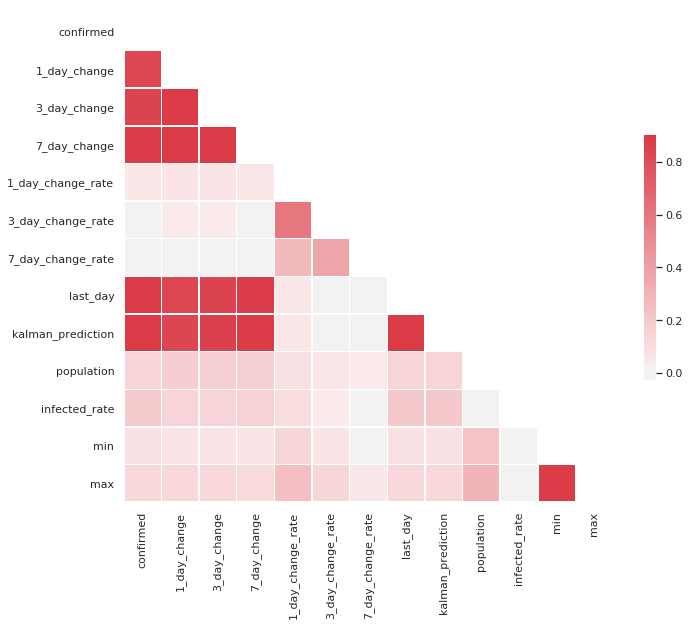

In [51]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [52]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.830279
3_day_change         0.852648
7_day_change         0.882614
1_day_change_rate    0.056233
3_day_change_rate    0.022056
7_day_change_rate   -0.000074
last_day             0.969025
kalman_prediction    0.969849
population           0.144054
infected_rate        0.198089
min                  0.085767
max                  0.121898
Name: confirmed, dtype: float64


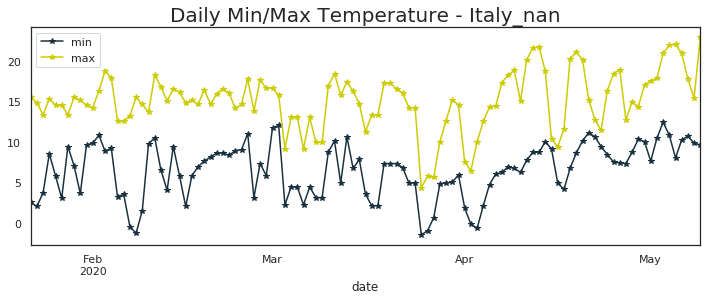

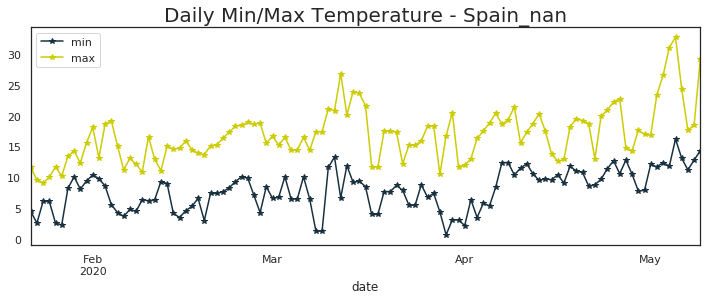

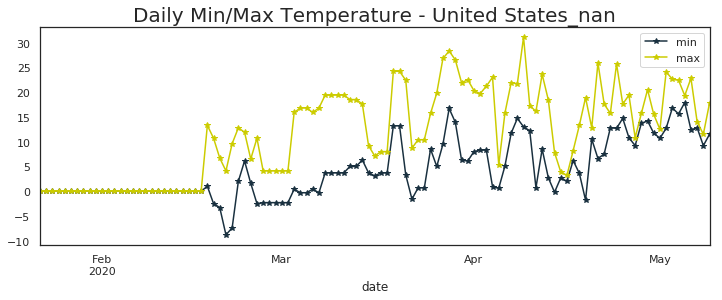

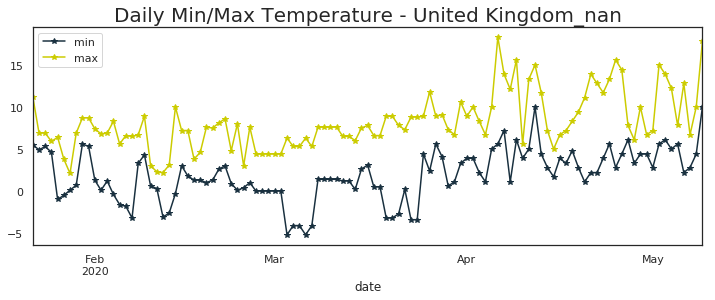

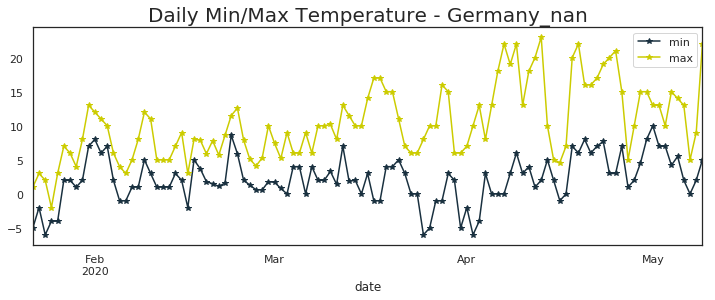

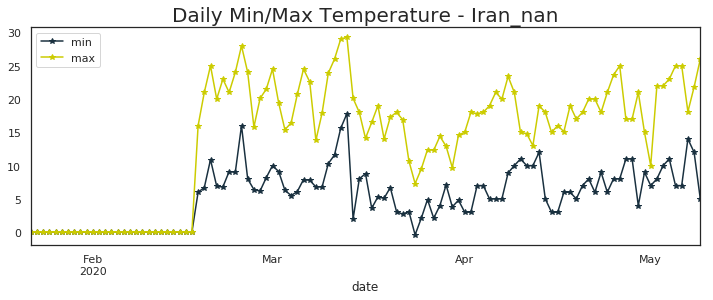

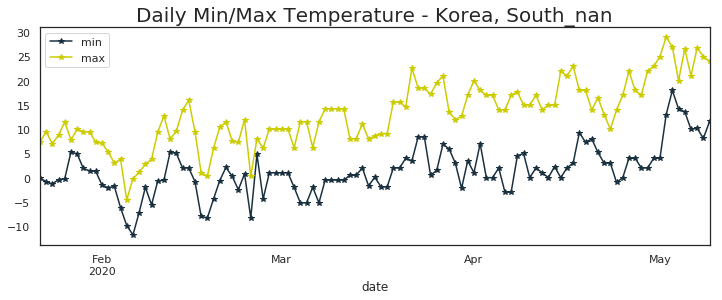

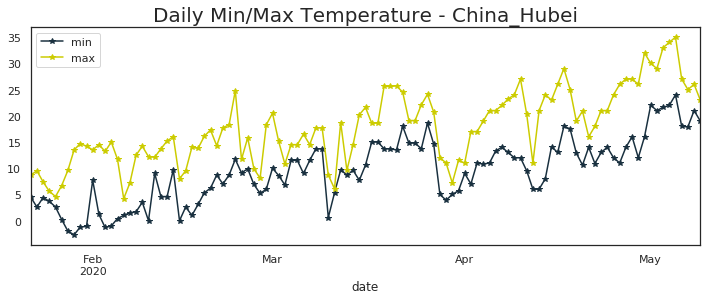

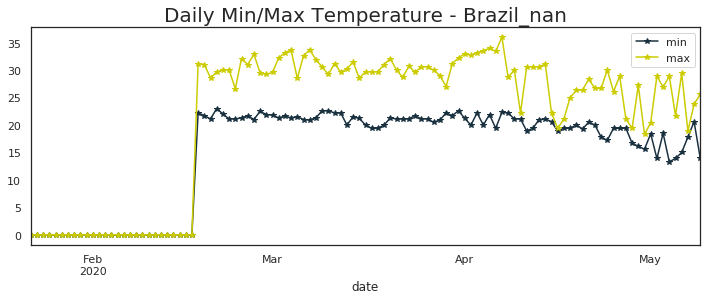

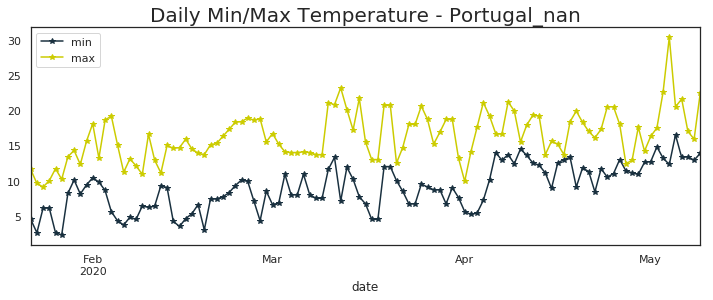

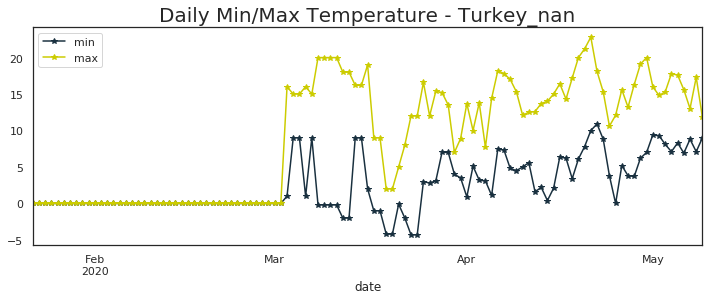

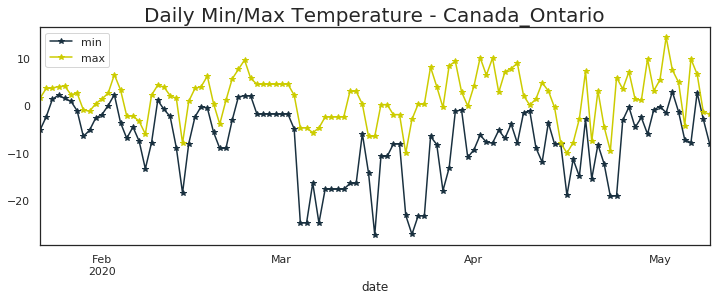

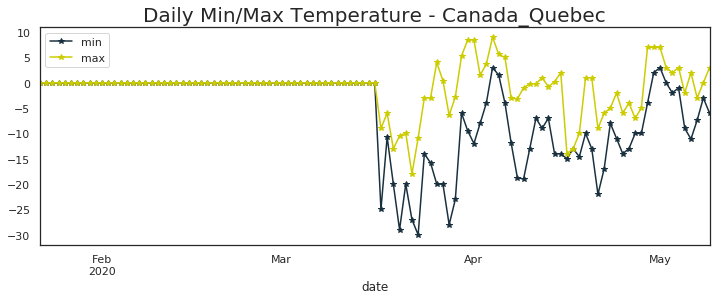

In [53]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [54]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Spain_nan                   16.2  32.7
Italy_nan                   12.4  22.9
United Kingdom_nan          10.0  18.3
Russia_nan                  13.0  30.0
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
Brazil_nan                  23.0  36.0
Turkey_nan                  10.9  22.8
Iran_nan                    17.8  29.3
China_Hubei                 24.0  35.0
Peru_nan                     0.0   0.0
India_nan                   30.0  43.0
Belgium_nan                 17.8  26.1
Netherlands_nan             13.9  26.1
Canada_Quebec                3.0   9.0
Saudi Arabia_nan             0.0   0.0
Ecuador_nan                  0.0   0.0
Mexico_nan                   0.0   0.0
Switzerland_nan             11.5  20.1
Portugal_nan                16.5  30.4
Pakistan_nan                16.0  28.0
Chile_nan                   

### Kalman X Days Ahead Prediction

In [55]:
%%R

#install.packages('reshape')

NULL


In [56]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [57]:
all_new=%R all_new

In [58]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

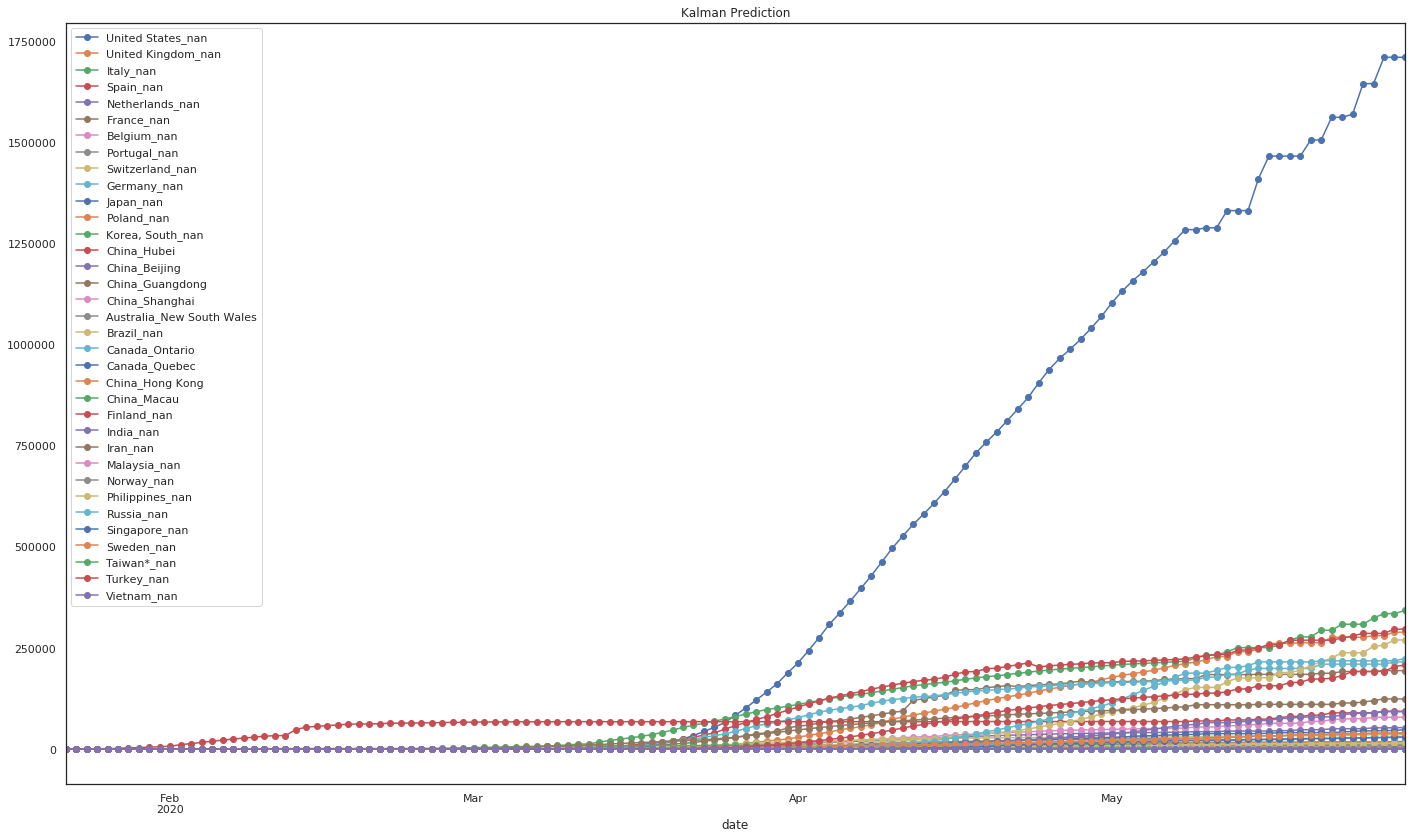

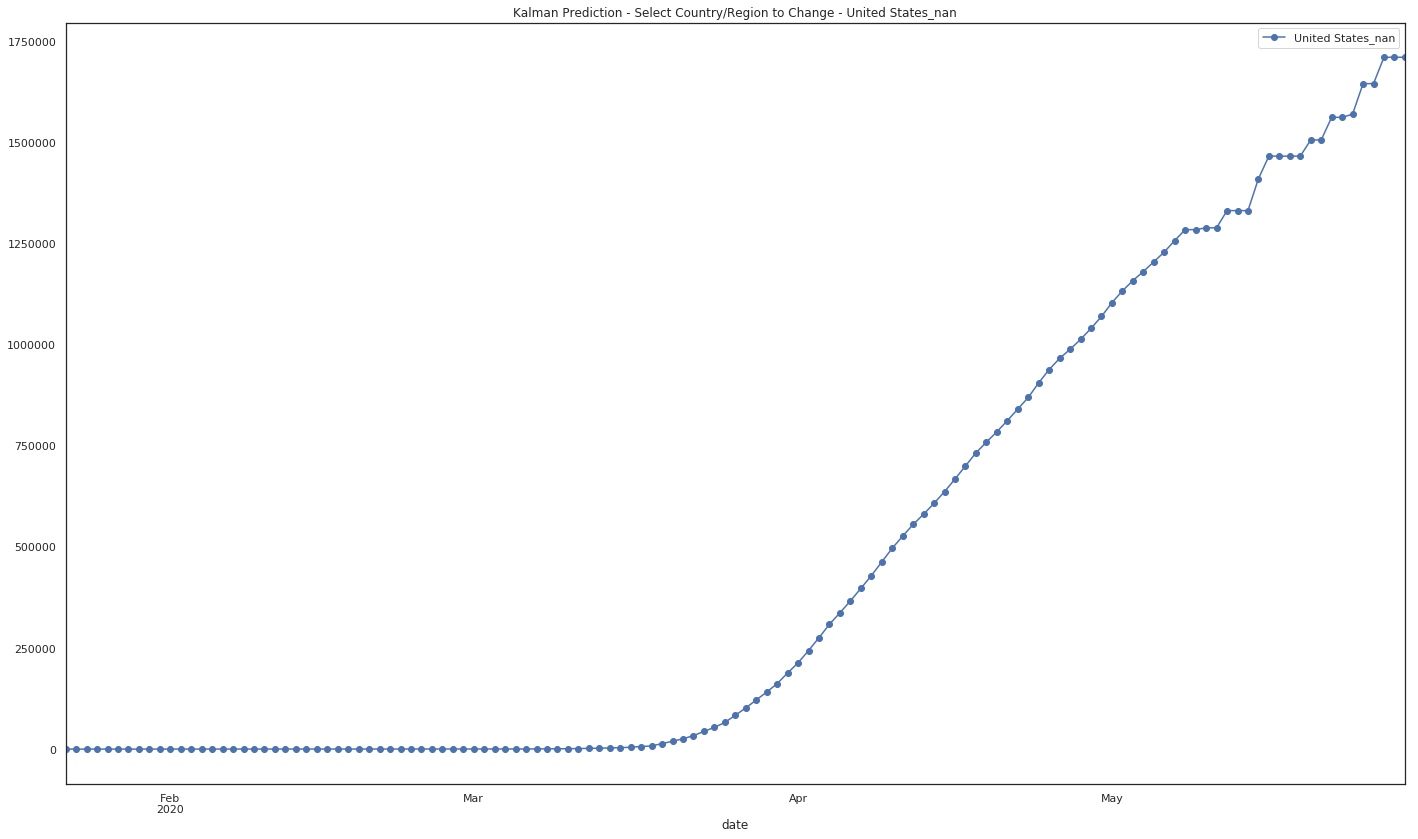

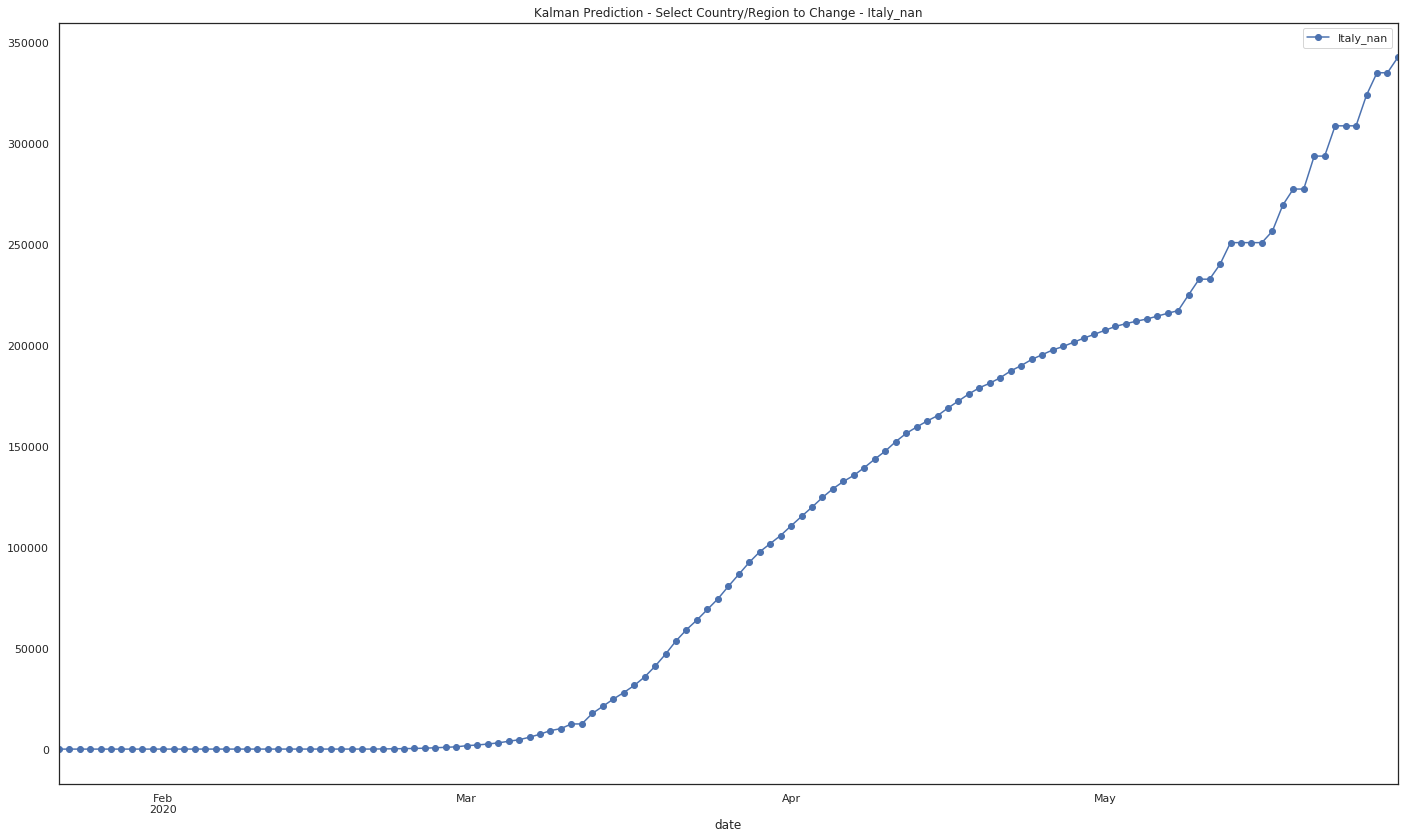

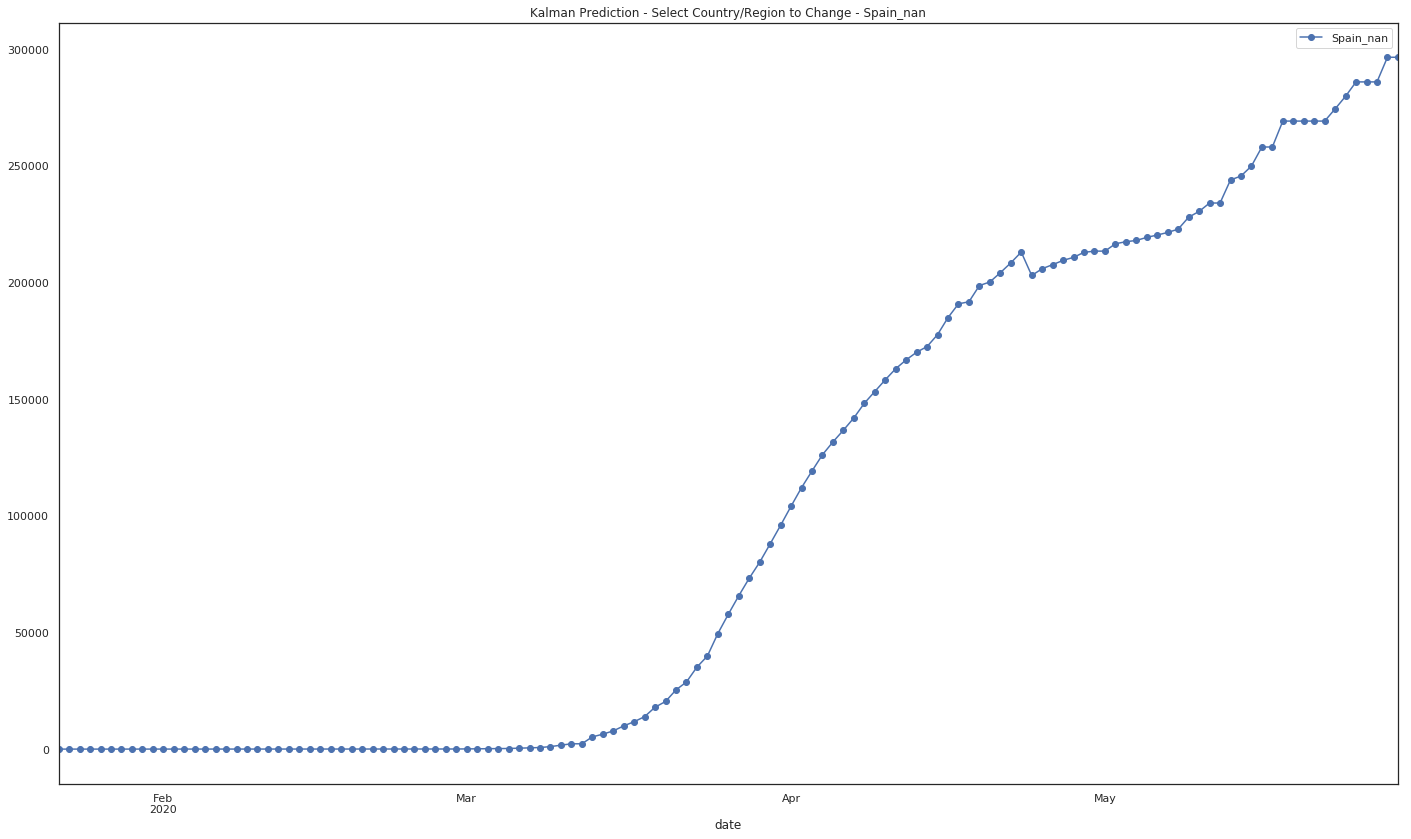

In [59]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


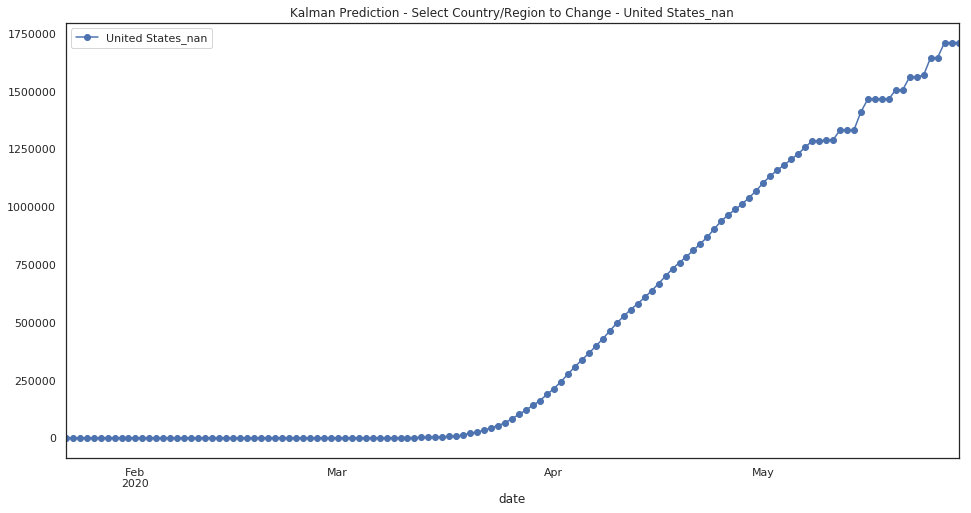

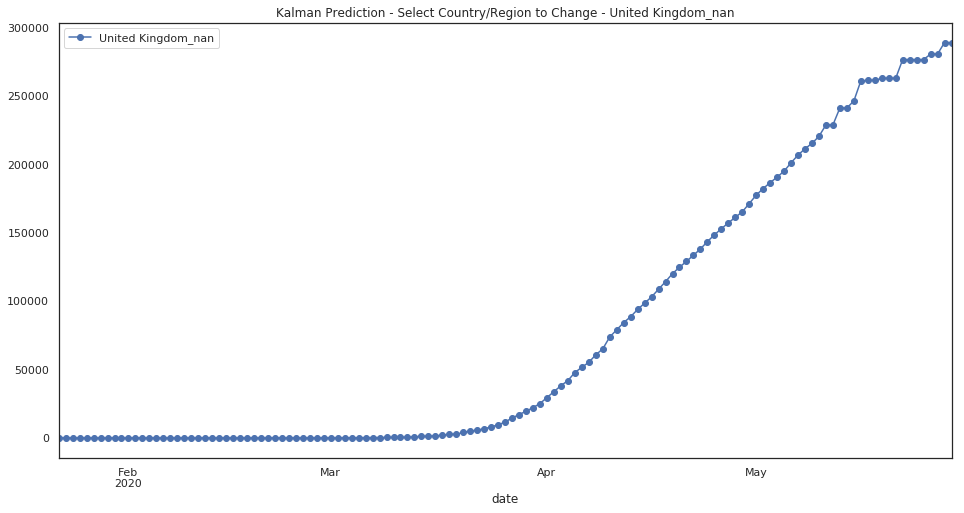

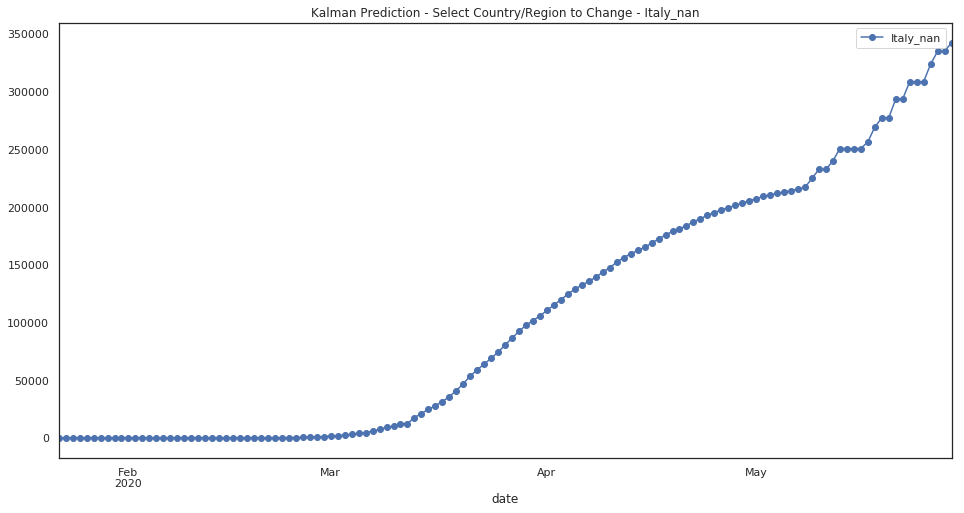

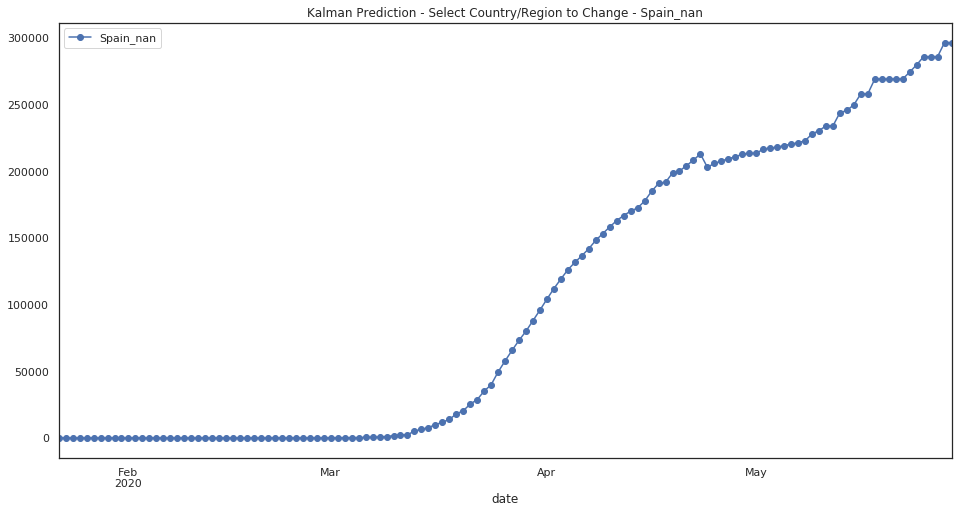

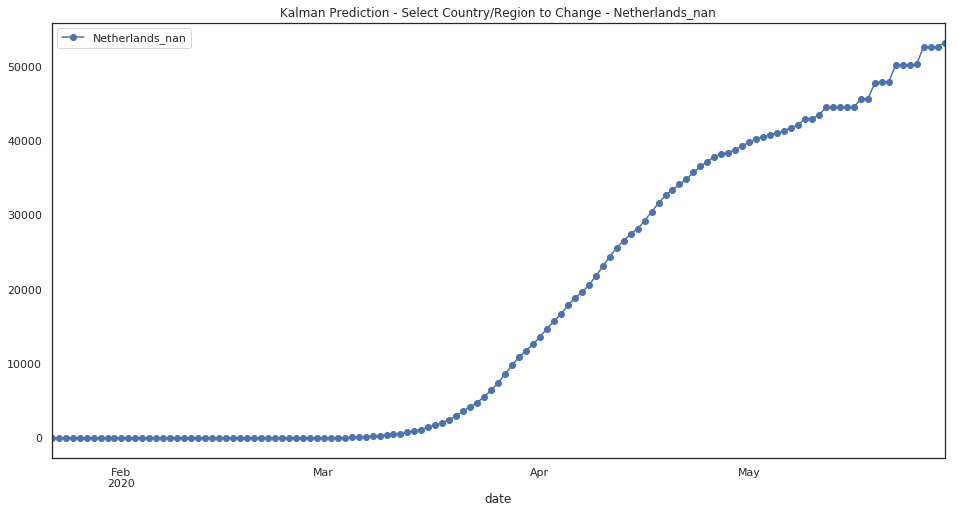

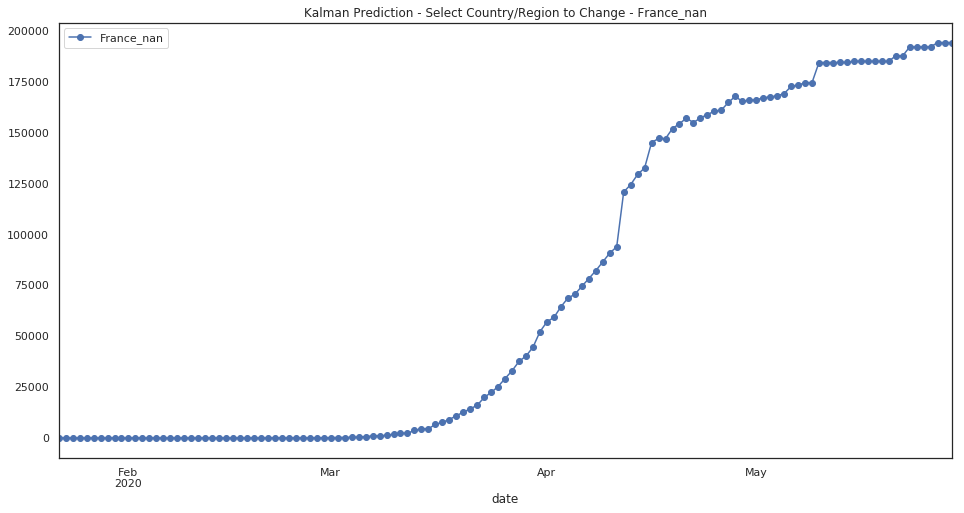

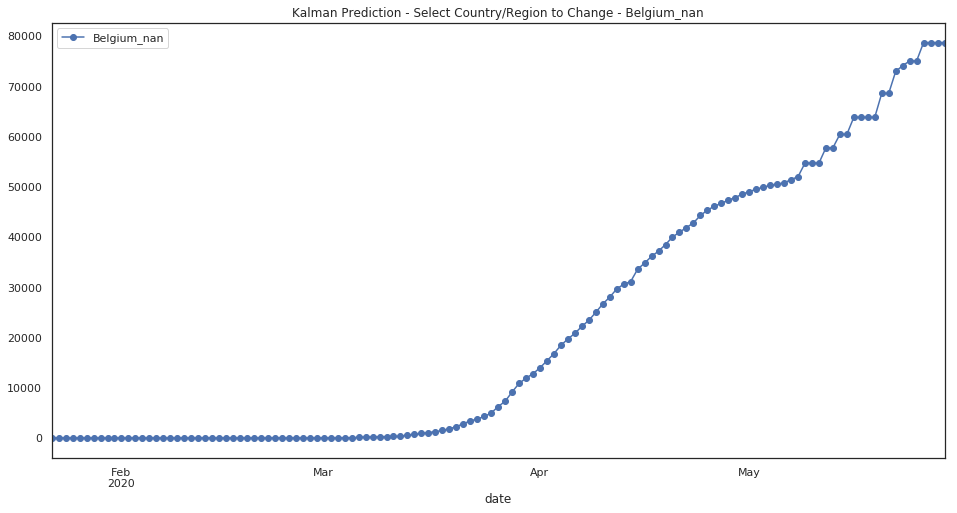

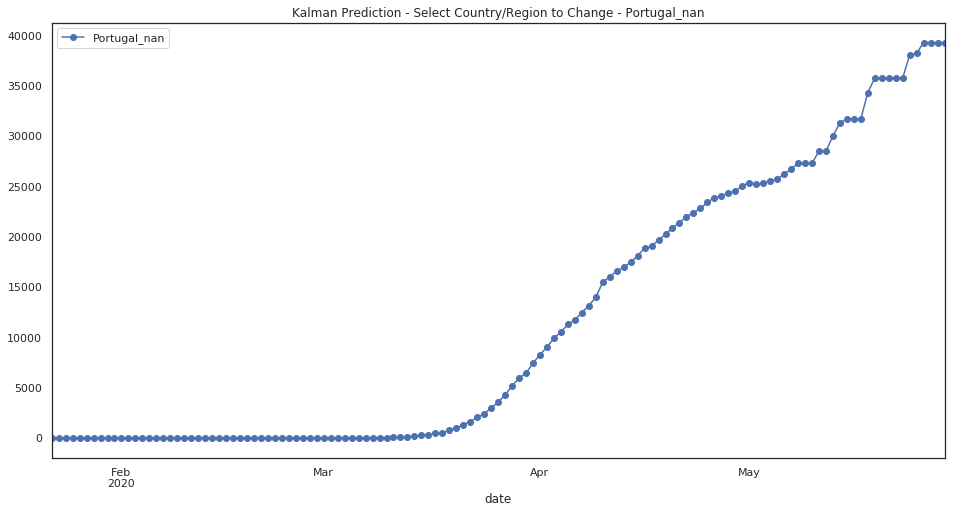

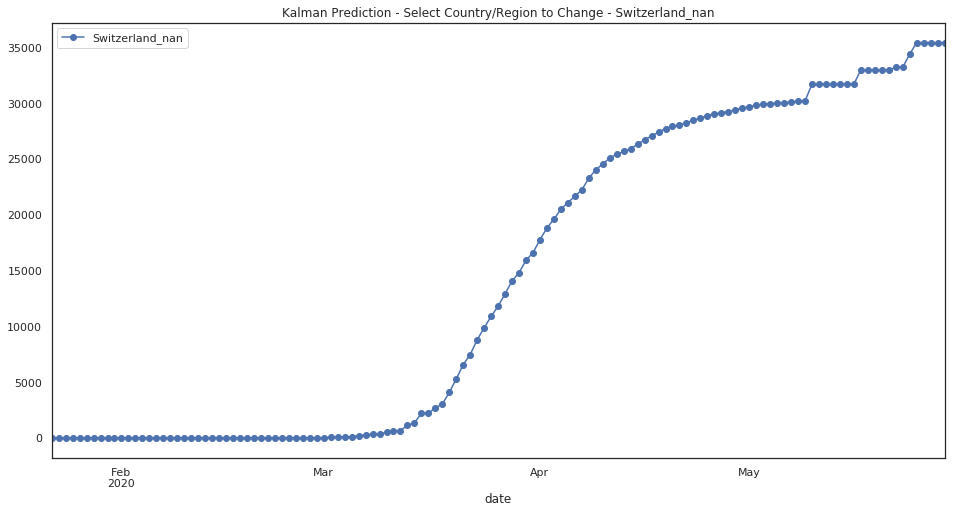

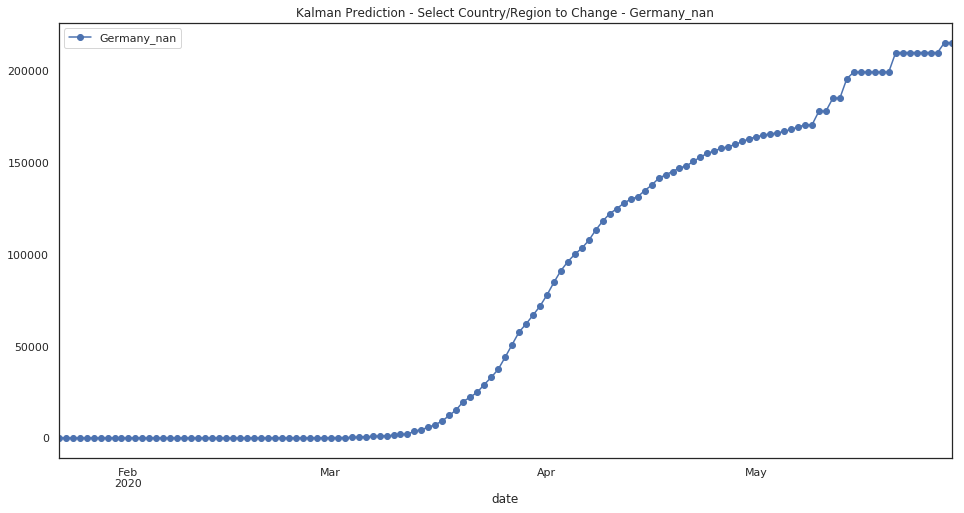

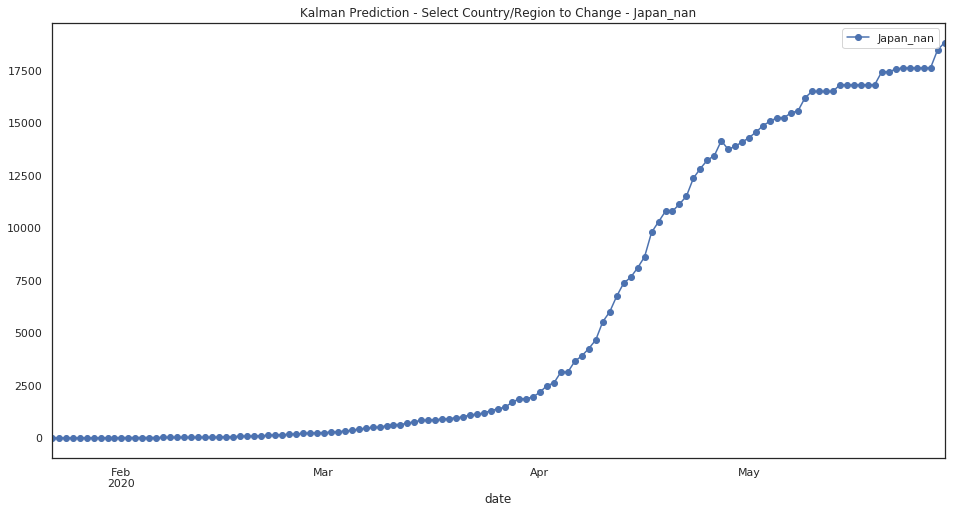

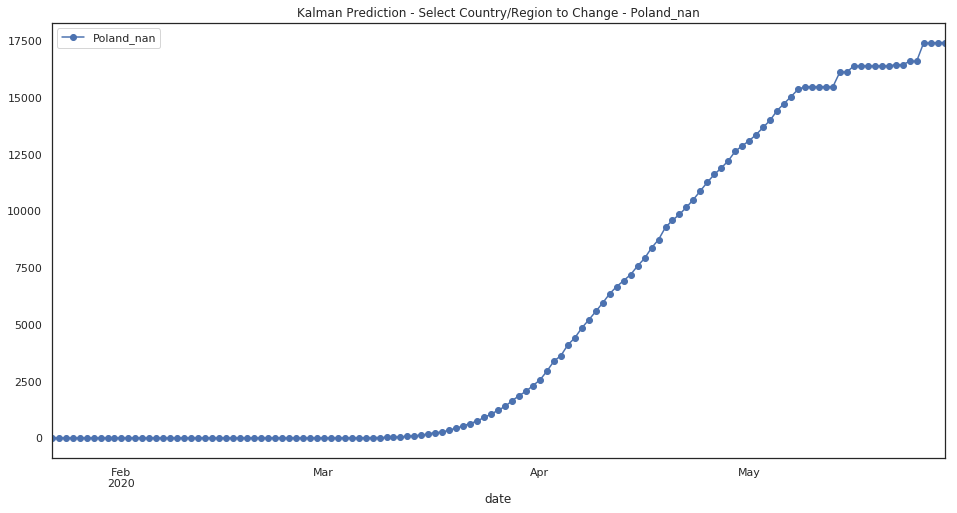

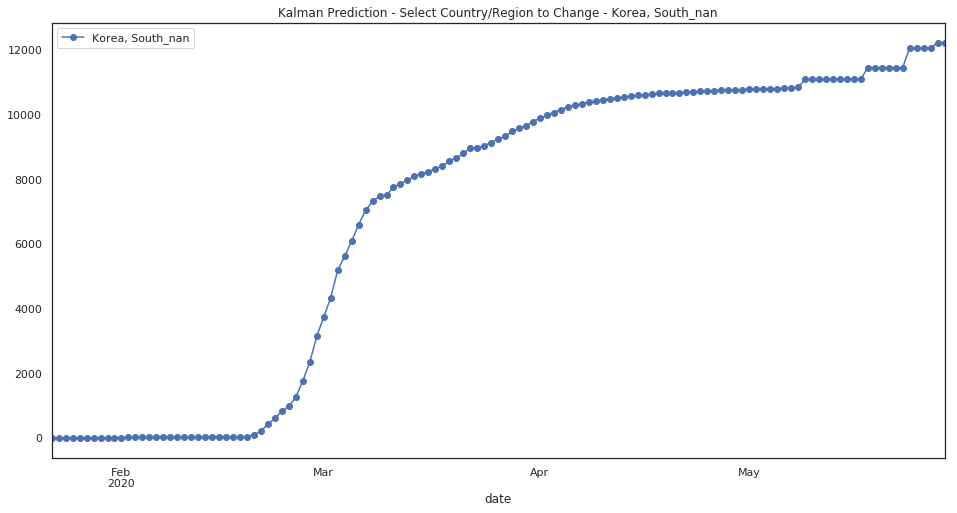

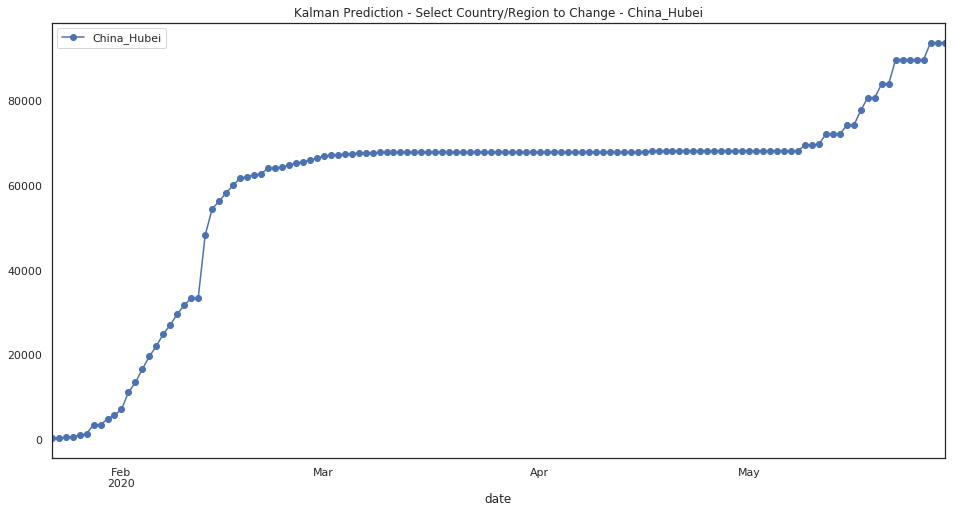

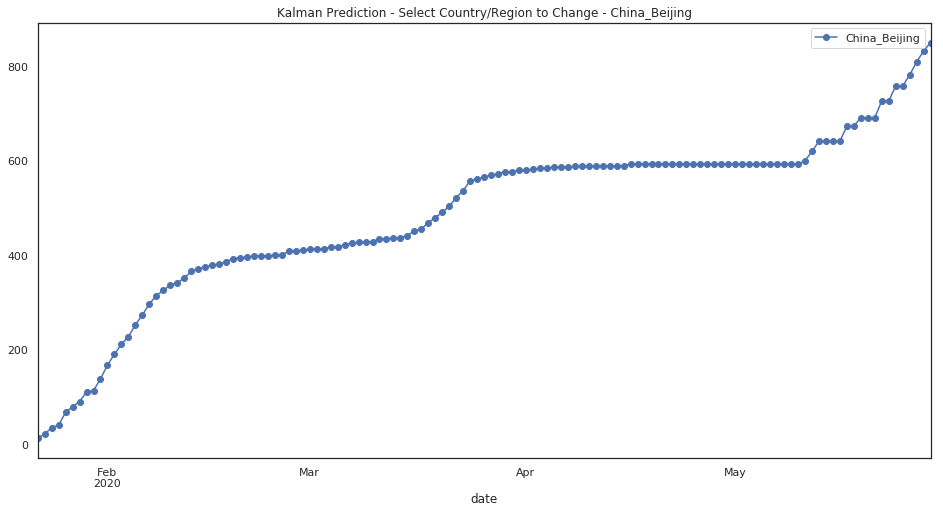

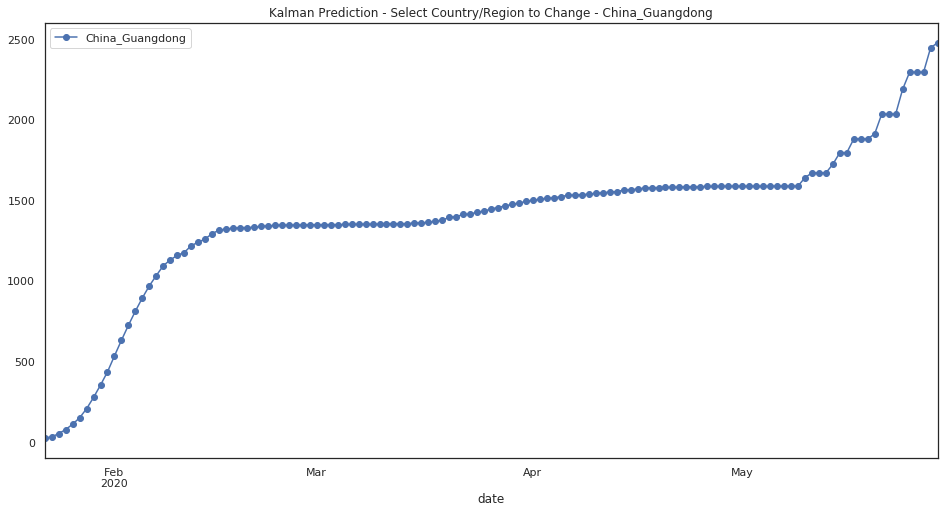

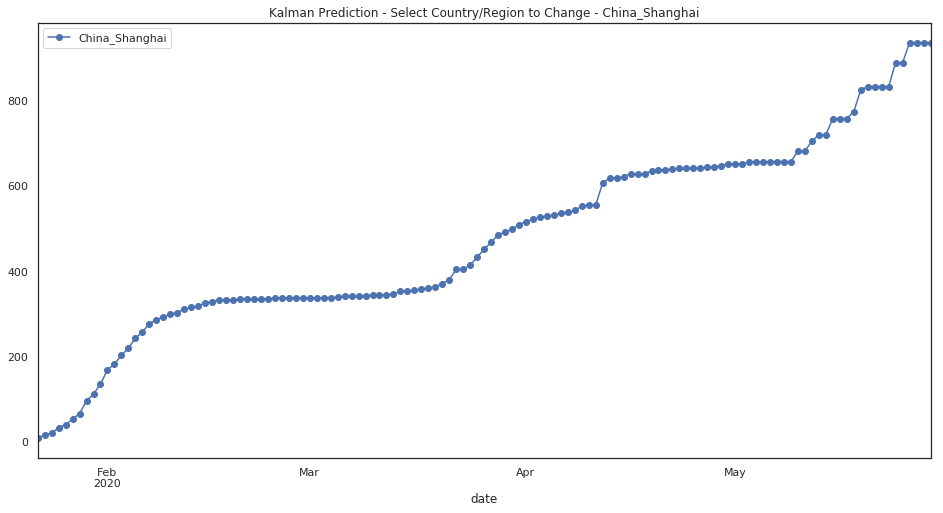

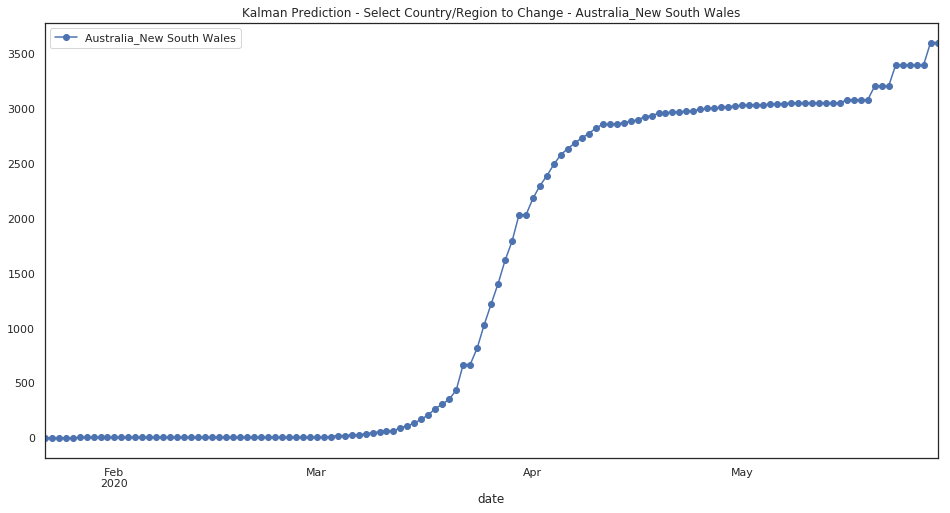

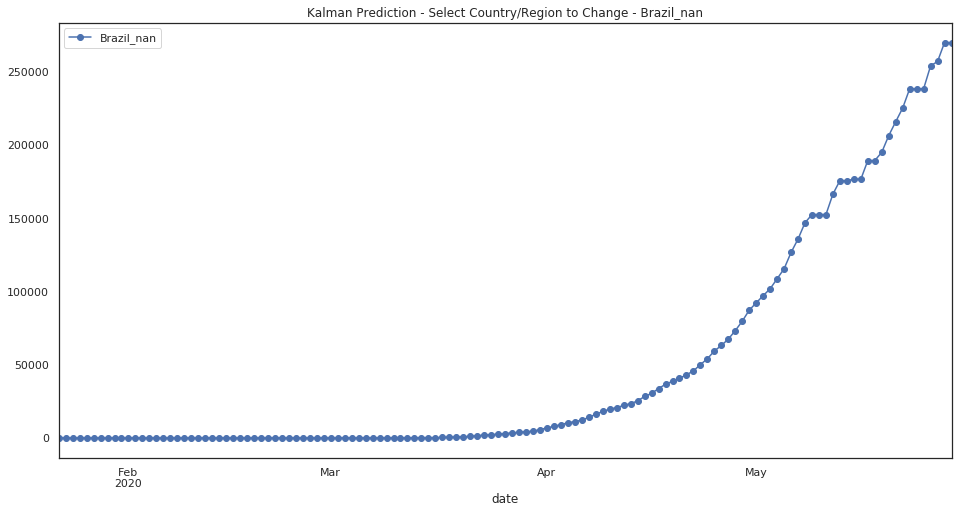

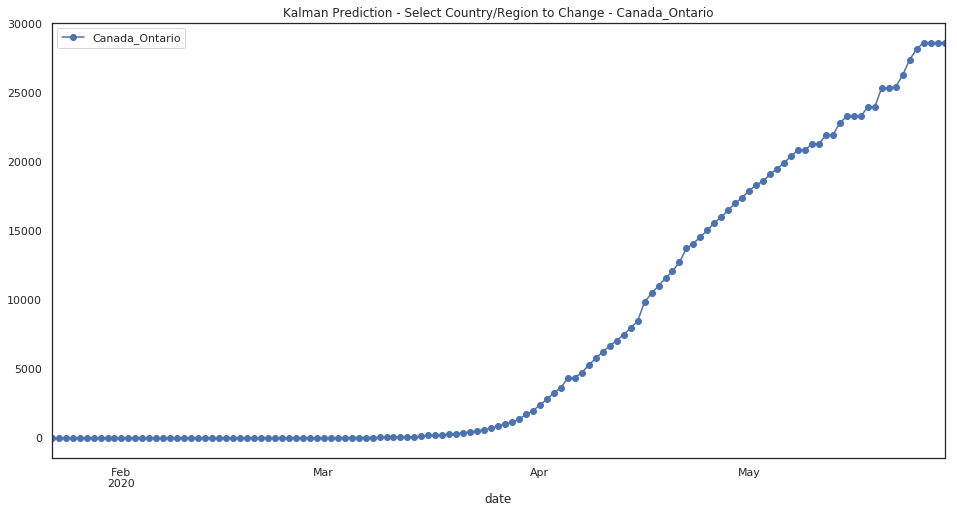

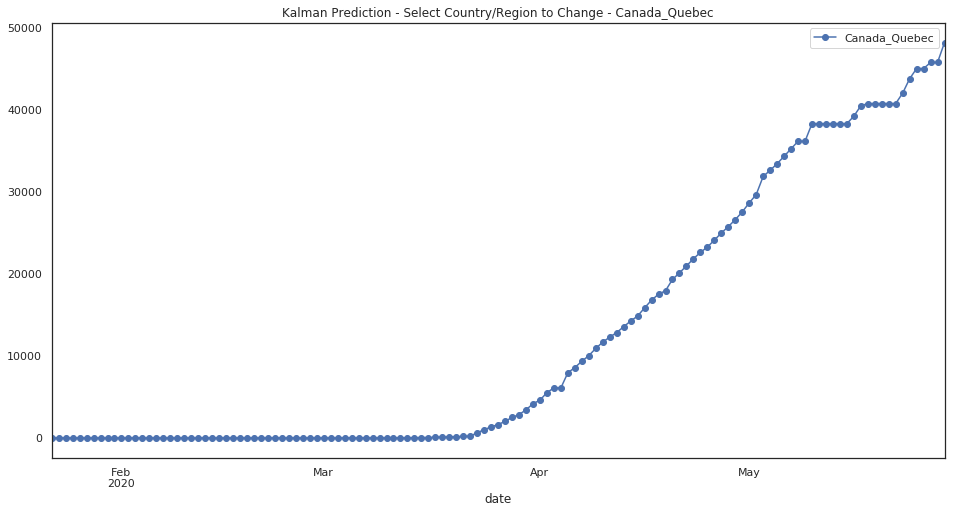

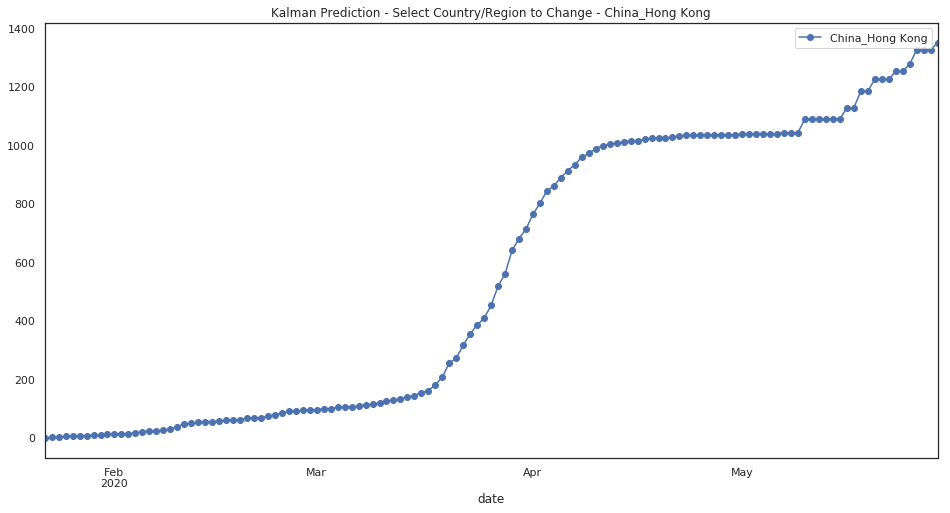

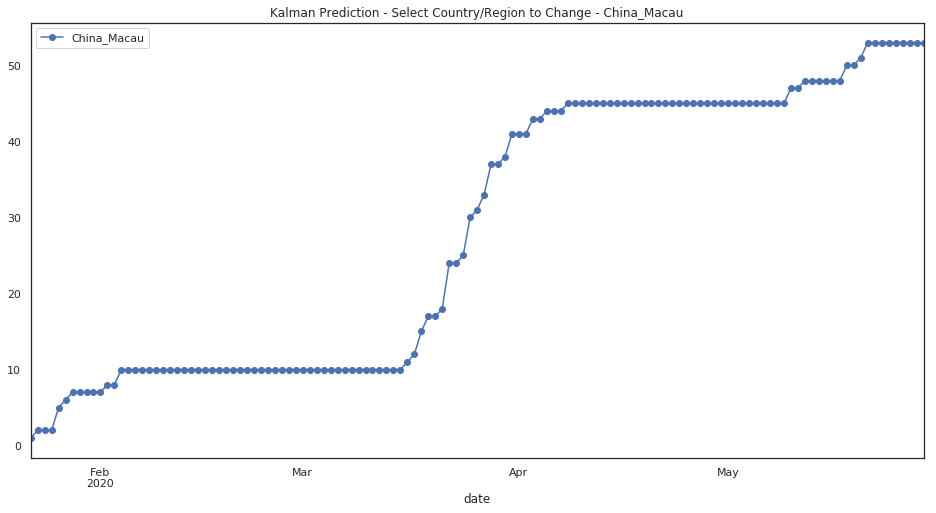

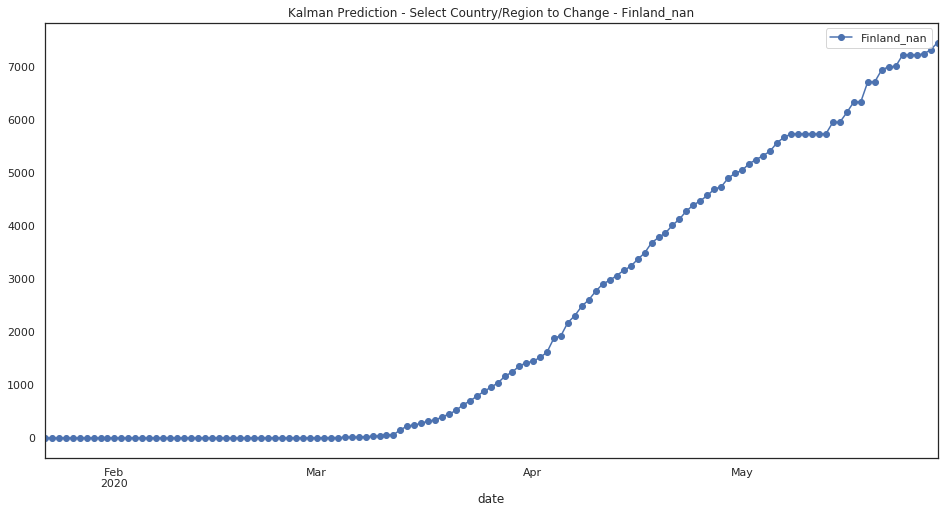

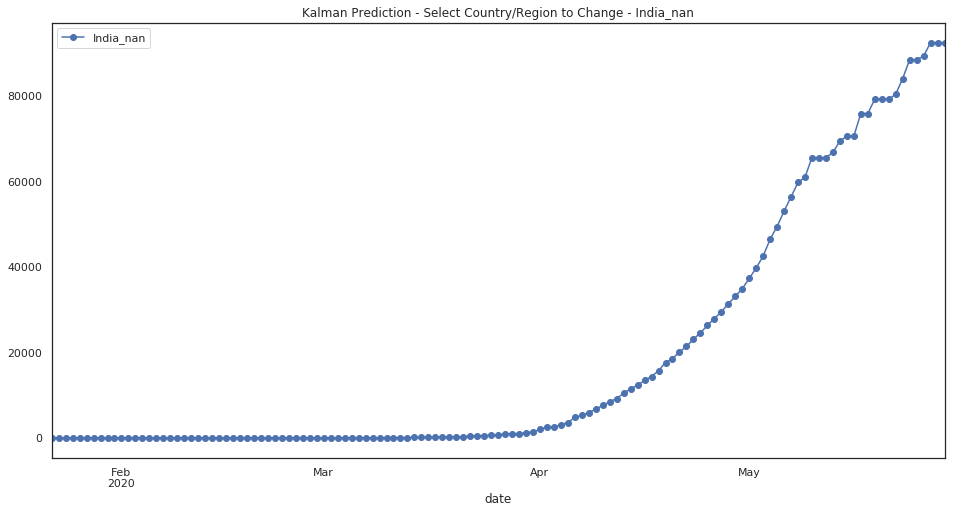

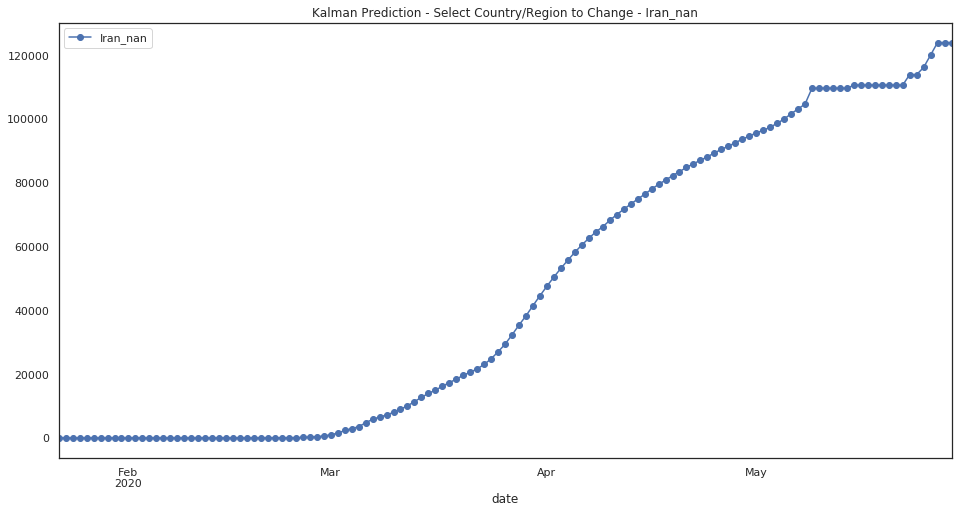

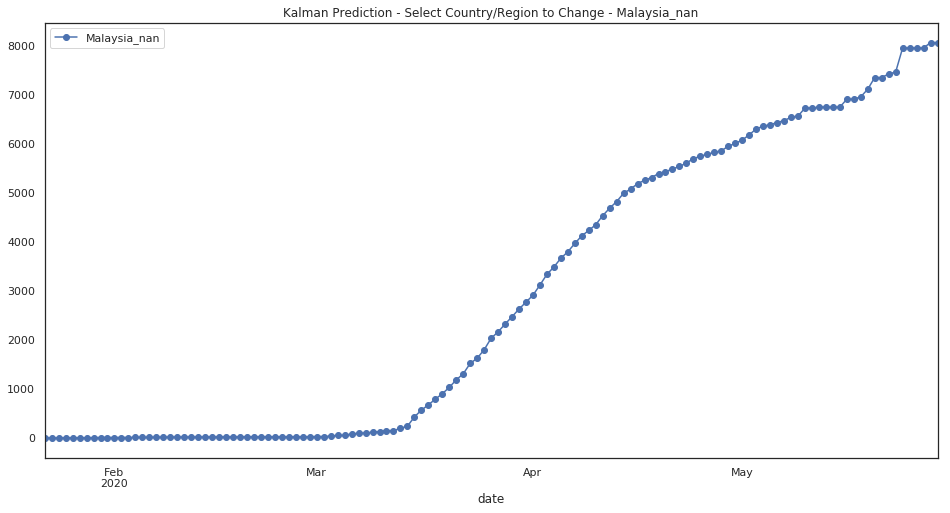

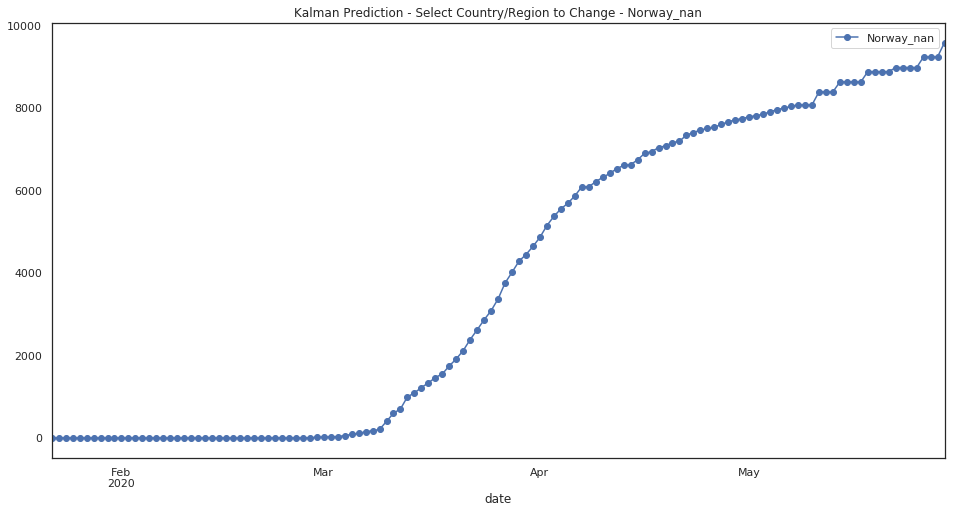

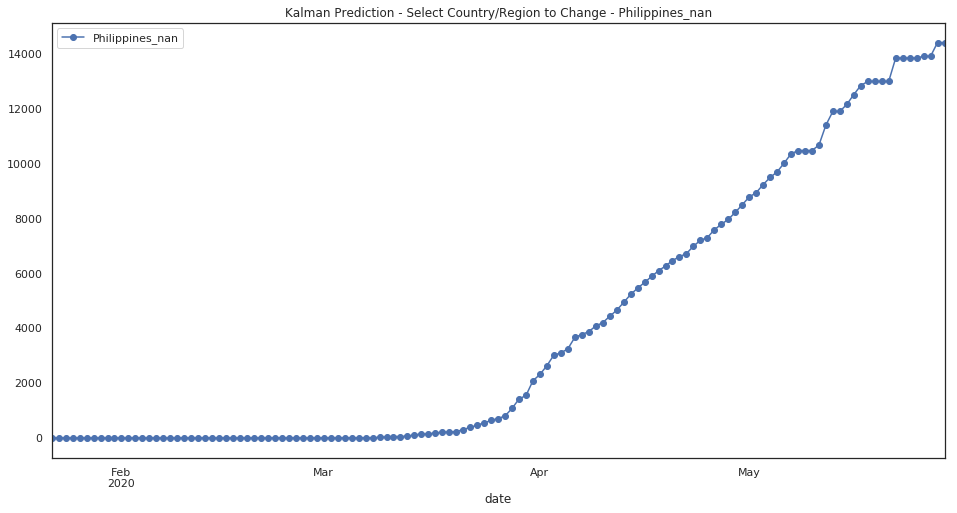

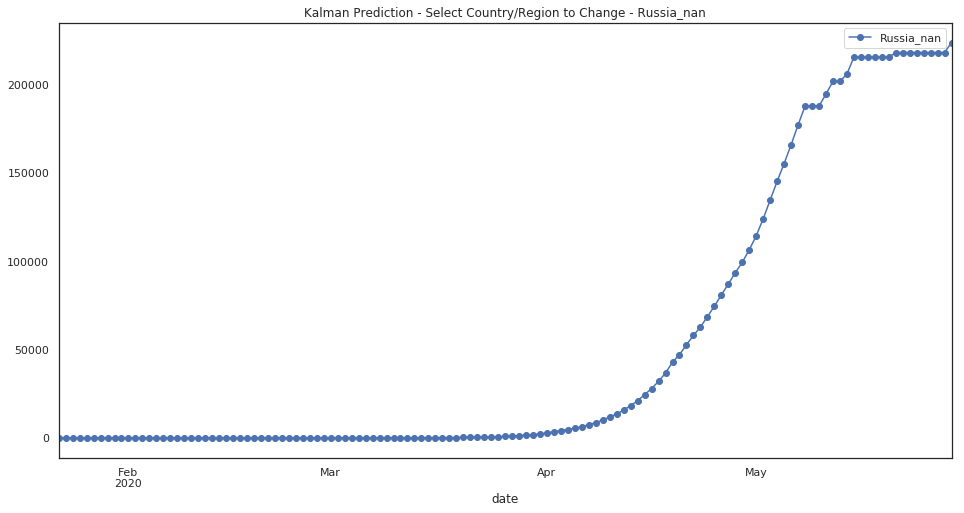

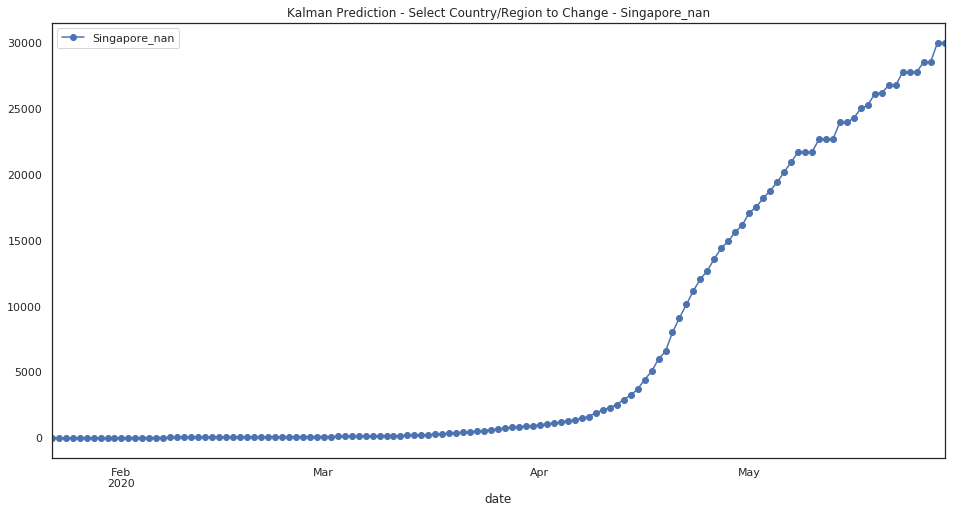

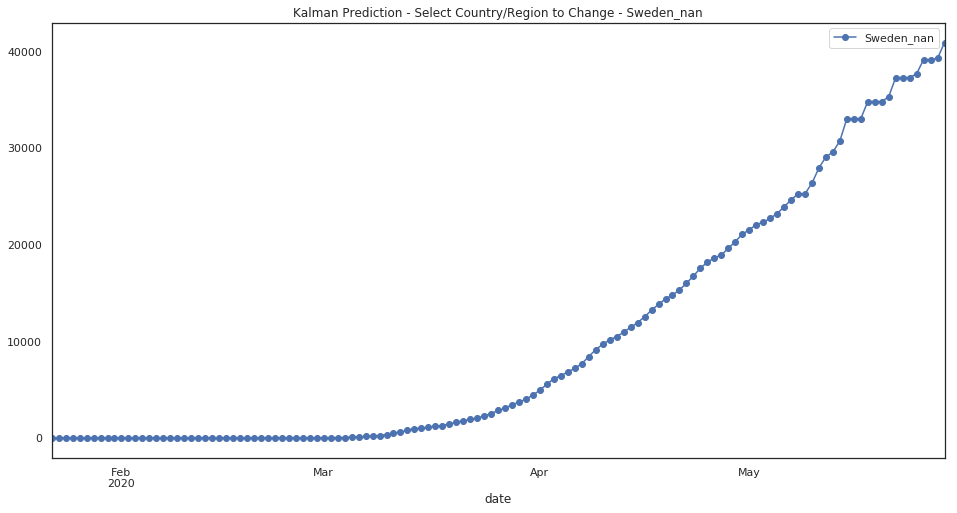

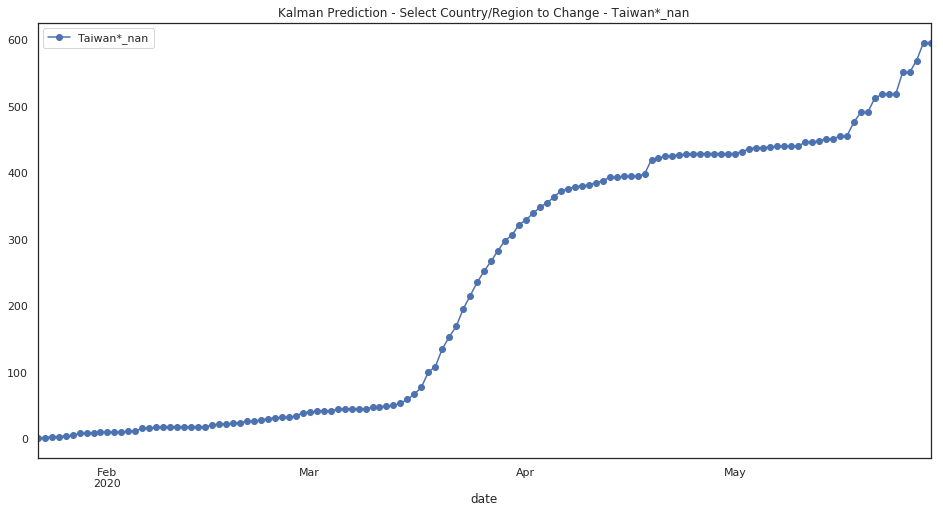

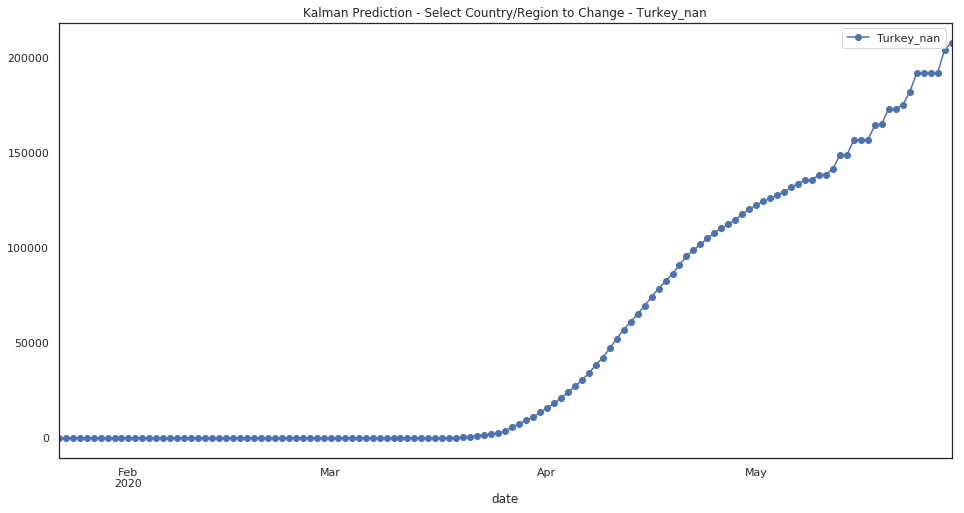

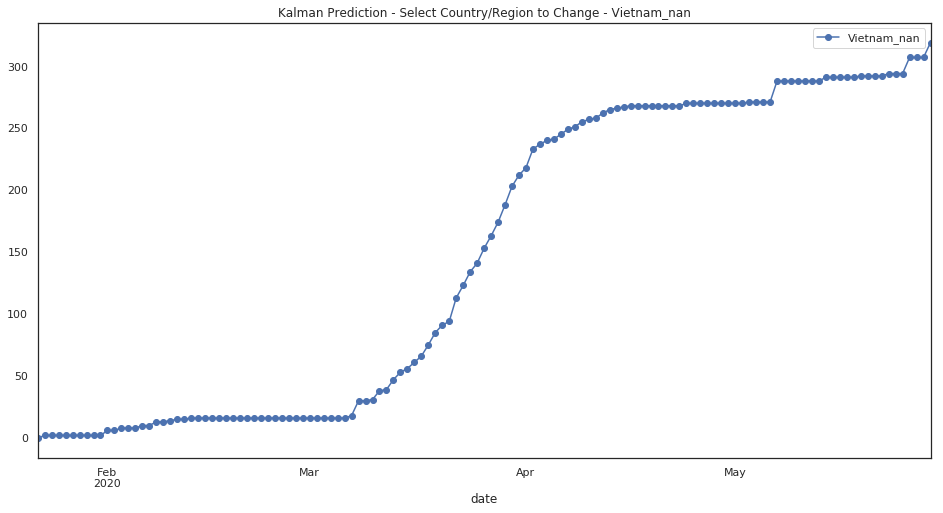

In [60]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [61]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-05-29 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       1710035.0
Italy_nan                                     NaN        342660.0
Spain_nan                                     NaN        296527.0
United Kingdom_nan                            NaN        288915.0
Brazil_nan                                    NaN        269837.0
Russia_nan                                    NaN        223847.0
Germany_nan                                   NaN        215432.0
Turkey_nan                                    NaN        207855.0
France_nan                                    NaN        193981.0
Iran_nan                                      NaN        123963.0
China_Hubei                                   NaN         93654.0
India_nan                                     NaN         92378.0
Peru_nan                                      NaN         79791.0
Belgium_nan                                   NaN         78700.0
Netherlands_nan                               NaN         53212.0
Saudi Arabia_nan                              NaN         50672.0
Canada_Quebec                                 NaN         48199.0
Mexico_nan                                    NaN         46177.0
Pakistan_nan                                  NaN         42777.0
Sweden_nan                                    NaN         40910.0
Portugal_nan                                  NaN         39265.0
Chile_nan                                     NaN         35966.0
Switzerland_nan                               NaN         35449.0
Ecuador_nan                                   NaN         35136.0
Ireland_nan                                   NaN         30359.0
Singapore_nan                                 NaN         30035.0
Qatar_nan                                     NaN         30023.0
Canada_Ontario                                NaN         28606.0
United Arab Emirates_nan                      NaN         27573.0
Belarus_nan                                   NaN         26602.0
...                                           ...             ...
Saint Lucia_nan                               NaN            22.0
Namibia_nan                                   NaN            22.0
Laos_nan                                      NaN            19.0
Comoros_nan                                   NaN            19.0
Burundi_nan                                   NaN            19.0
Netherlands_Curacao                           NaN            19.0
Nicaragua_nan                                 NaN            18.0
Seychelles_nan                                NaN            17.0
Holy See_nan                                  NaN            16.0
United Kingdom_Falkland Islands (Malvinas)    NaN            13.0
Canada_Grand Princess                         NaN            13.0
Denmark_Greenland                             NaN            12.0
United Kingdom_Turks and Caicos Islands       NaN            12.0
United Kingdom_Montserrat                     NaN            11.0
Canada_Yukon                                  NaN            11.0
Suriname_nan                                  NaN            10.0
United Kingdom_British Virgin Islands         NaN            10.0
MS Zaandam_nan                                NaN             9.0
Papua New Guinea_nan                          NaN             8.0
Mauritania_nan                                NaN             8.0
Bhutan_nan                                    NaN             7.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             6.0
Western Sahara_nan                            NaN             6.0
France_Saint Barthelemy                       NaN             6.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
France_Saint Pierre and Miquelon              NaN             1.0
Canada_Diamond Princess                       NaN             1.0
China_Tibet                                   NaN             1.0
Canada_Recovered      

In [62]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [63]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [64]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [65]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [66]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [67]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-01-22            -20.0       -240.0        -17.0      -8939.0   
2020-01-23              0.0          0.0          0.0          0.0   
2020-01-24              0.0          0.0          0.0          0.0   
2020-01-25              0.0          0.0          0.0          0.0   
2020-01-26              0.0          0.0          0.0          0.0   
2020-01-27              0.0          0.0          0.0          0.0   
2020-01-28              0.0          0.0          0.0          0.0   
2020-01-29              0.0          0.0          0.0          0.0   
2020-01-30              0.0          0.0          0.0          0.0   
2020-01-31              0.0          0.0          0.0          0.0   
2020-02-01              0.0          0.0          0.0          0.0   
2020-02-02              0.0          0.0          0.0          0.0   
2020-02-03              0.0          0.0          0.0          0.0   
2020-02-04              0.0          0.0          0.0          0.0   
2020-02-05              0.0          0.0          0.0          0.0   
2020-02-06              0.0          0.0          0.0          0.0   
2020-02-07              0.0          0.0          0.0          0.0   
2020-02-08              0.0          0.0          0.0          0.0   
2020-02-09              0.0          0.0          0.0          0.0   
2020-02-10              0.0          0.0          0.0          0.0   
2020-02-11              0.0          0.0          0.0          0.0   
2020-02-12              0.0          0.0          0.0          0.0   
2020-02-13              0.0          0.0          0.0          0.0   
2020-02-14              0.0          0.0          0.0          0.0   
2020-02-15              0.0          0.0          0.0          0.0   
2020-02-16              0.0          0.0          0.0          0.0   
2020-02-17              0.0          0.0          0.0          0.0   
2020-02-18             19.0          0.0         20.0          0.0   
2020-02-19              0.0          0.0         23.0          0.0   
2020-02-20             13.0          0.0         22.0          0.0   
...                     ...          ...          ...          ...   
2020-05-01           2171.0        773.0       4006.0        745.0   
2020-05-02           2335.0        782.0       4154.0        745.0   
2020-05-03           2469.0        789.0       4295.0        747.0   
2020-05-04           2704.0        795.0       4474.0        748.0   
2020-05-05           2894.0        803.0       4648.0        750.0   
2020-05-06           3224.0        820.0       4838.0        751.0   
2020-05-07           3392.0        832.0       4997.0        751.0   
2020-05-08           3563.0        842.0       5182.0        752.0   
2020-05-09           3778.0        850.0       5369.0        752.0   
2020-05-10           4045.0        850.0       5420.0        752.0   
2020-05-11           4173.0        850.0       5420.0        752.0   
2020-05-12           4581.0        850.0       5919.0        752.0   
2020-05-13           4581.0        850.0       5919.0        752.0   
2020-05-14           4652.0        850.0       5919.0        755.0   
2020-05-15           5193.0        850.0       6350.0        755.0   
2020-05-16           5304.0        850.0       6463.0        755.0   
2020-05-17           5466.0        850.0       6616.0        755.0   
2020-05-18           5901.0        852.0       6616.0        755.0   
2020-05-19           5901.0        852.0       7156.0        755.0   
2020-05-20           5901.0        852.0       7156.0        755.0   
2020-05-21           6254.0        875.0       7292.0        755.0   
2020-05-22           6453.0        875.0       7326.0        786.0   
2020-05-23           6933.0        875.0       7377.0        786.0   
2020-05-24           7019.0        875.0       7377.0        808.0   
2020-05-25

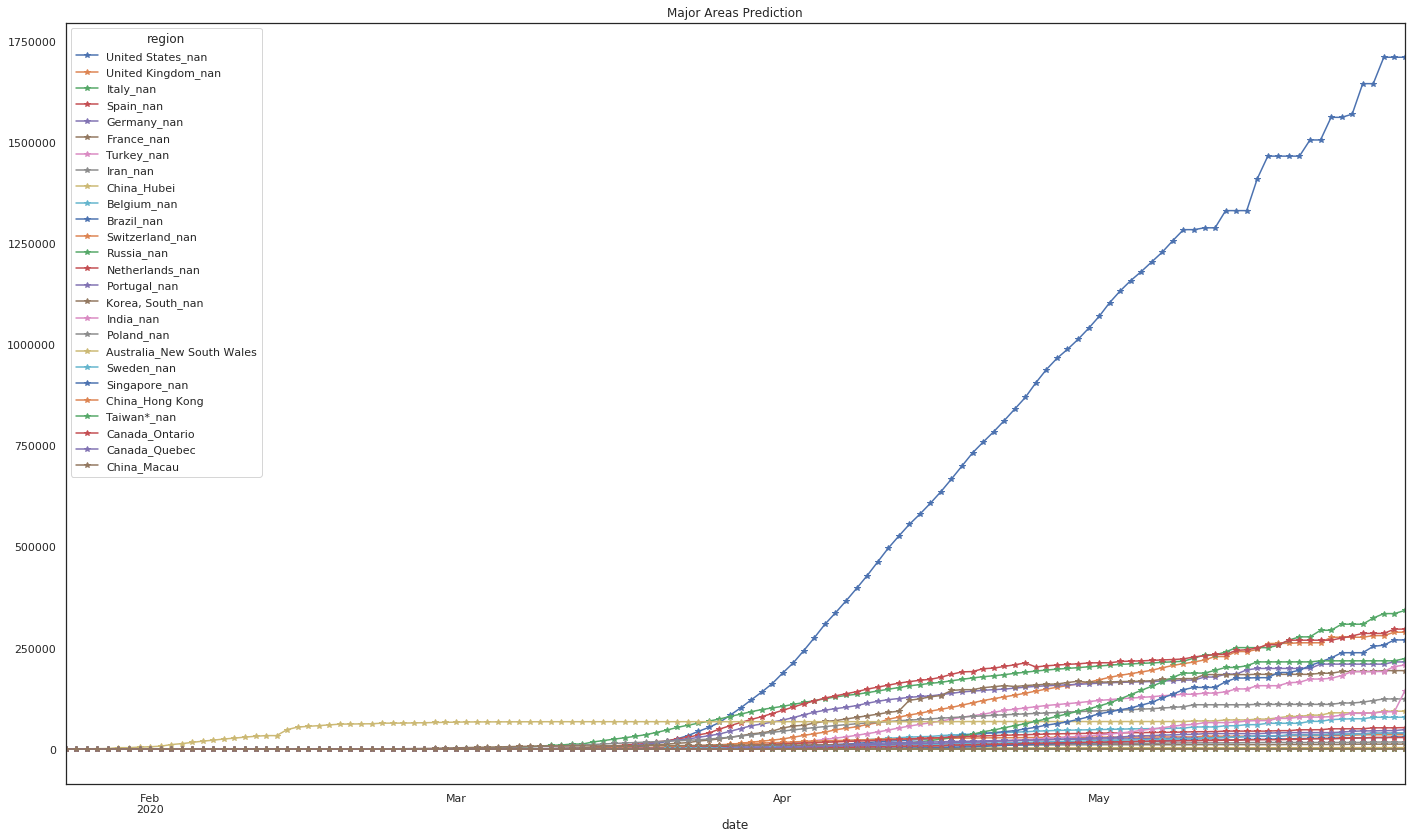

In [68]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

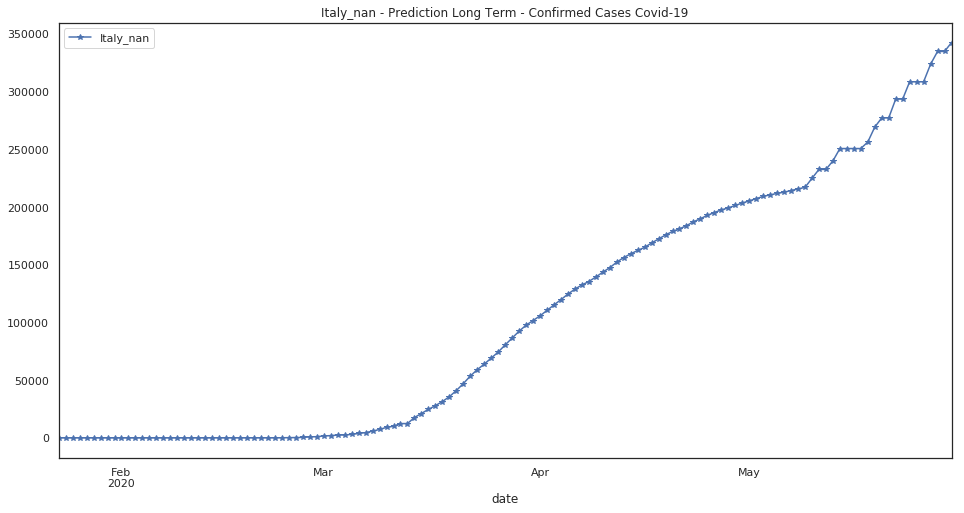

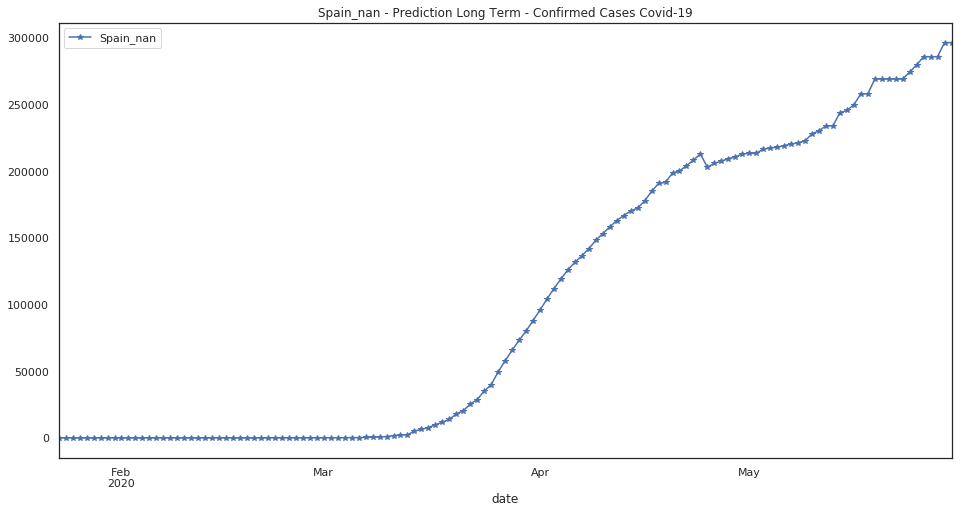

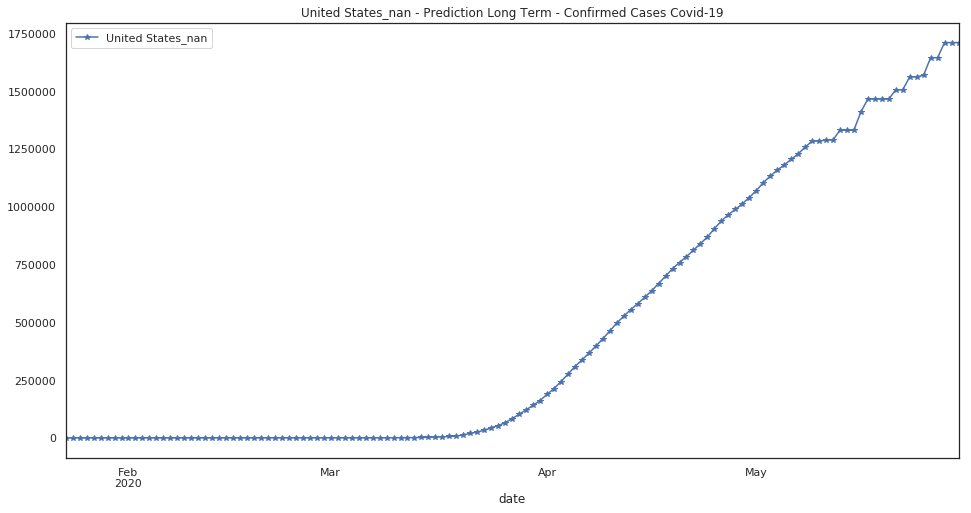

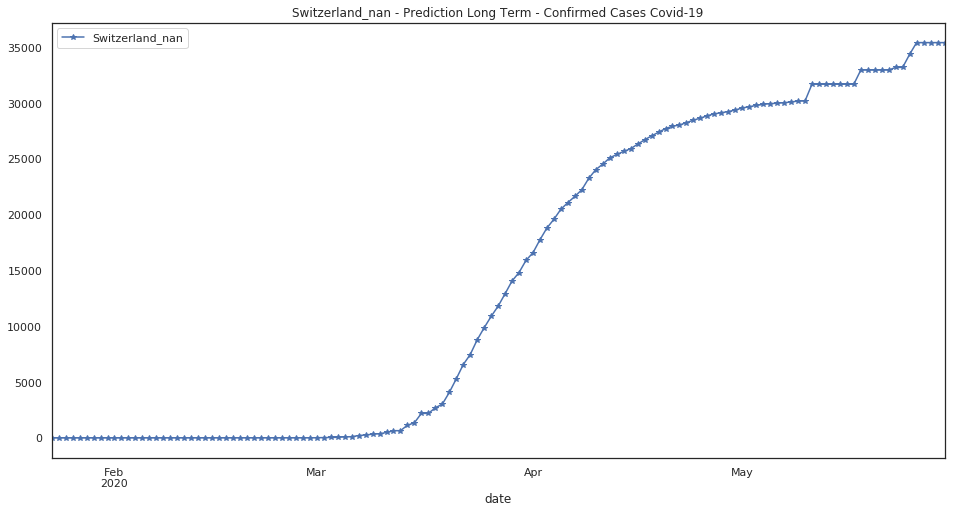

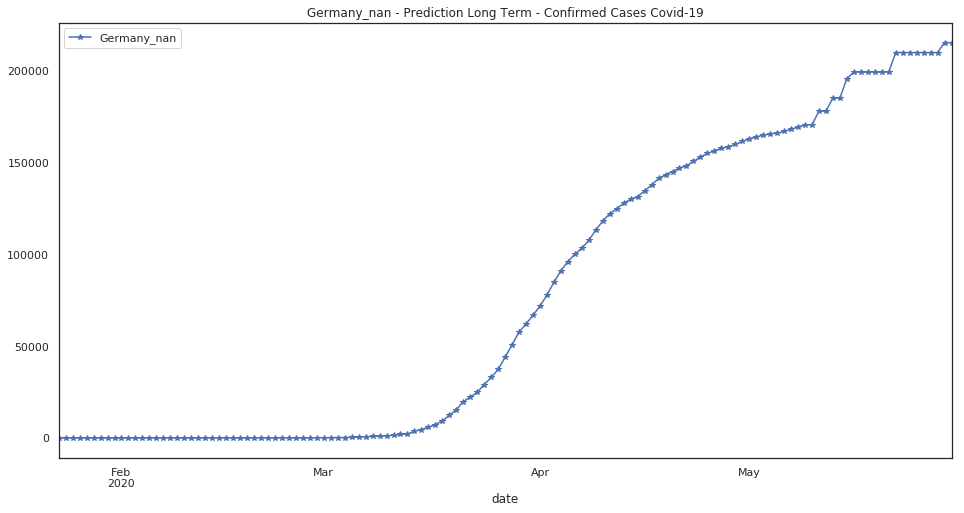

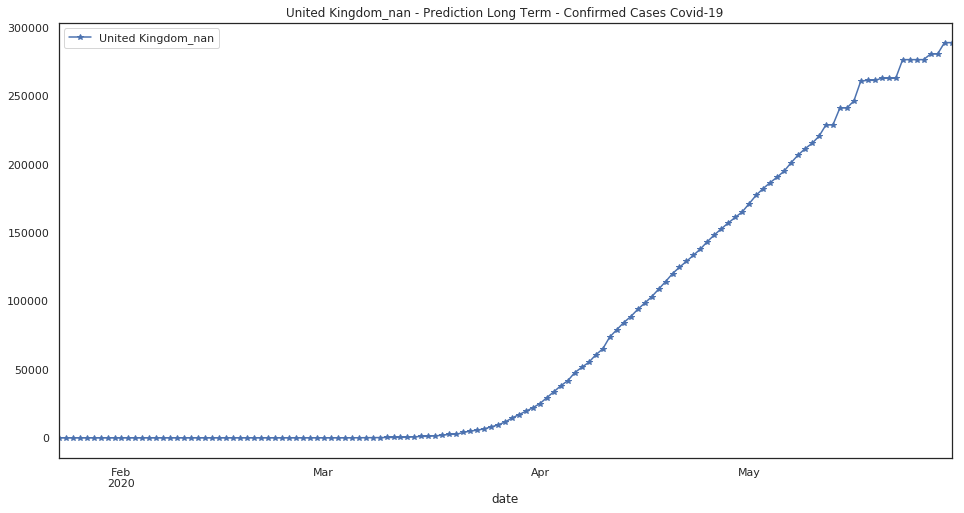

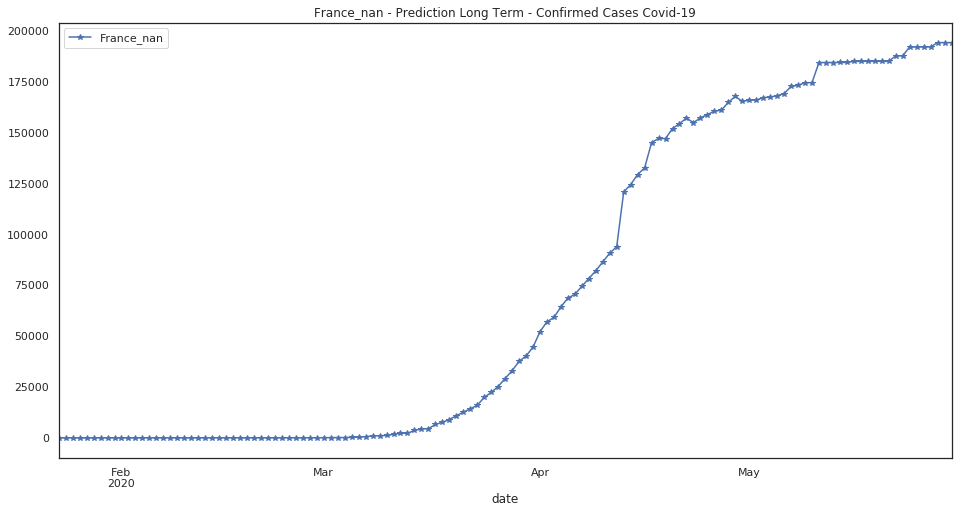

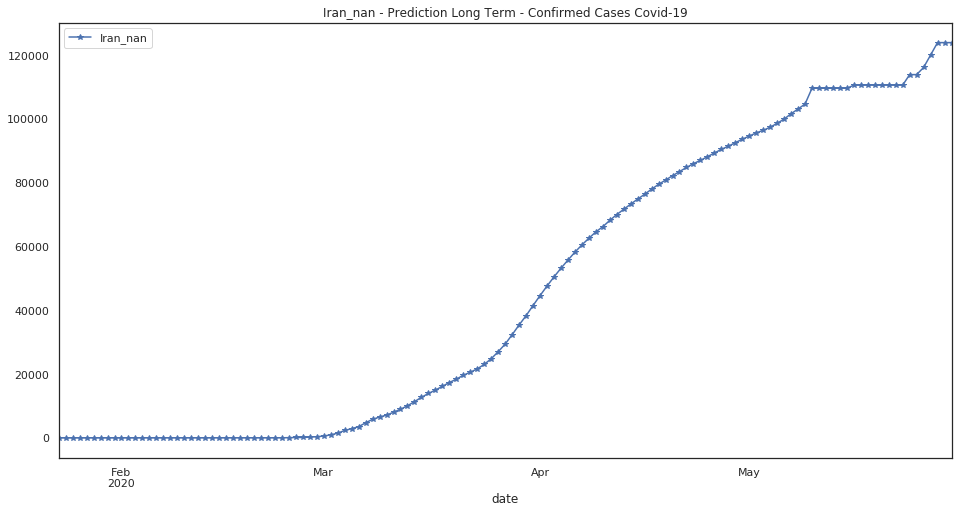

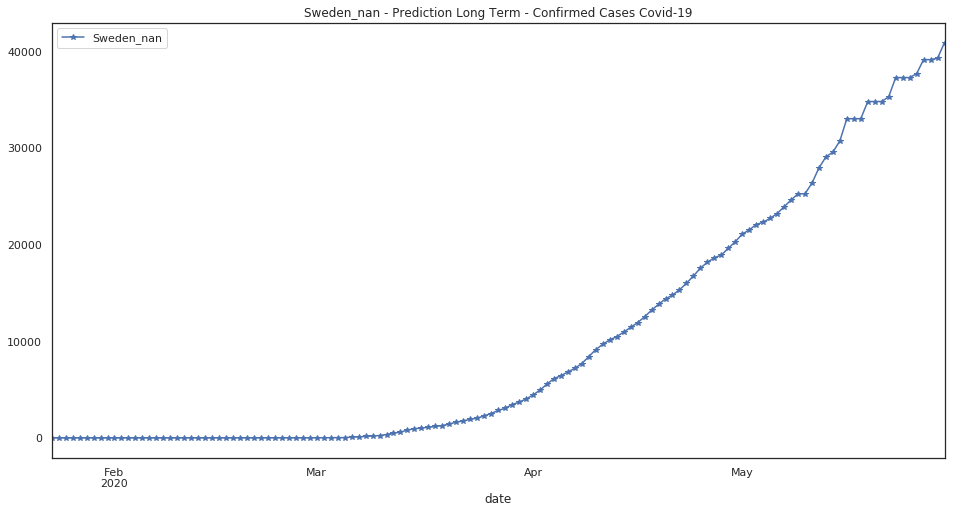

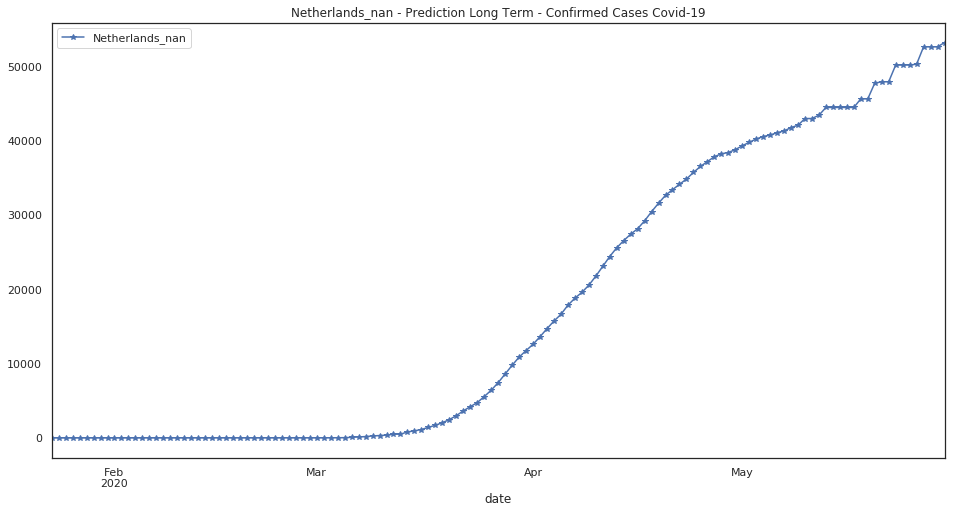

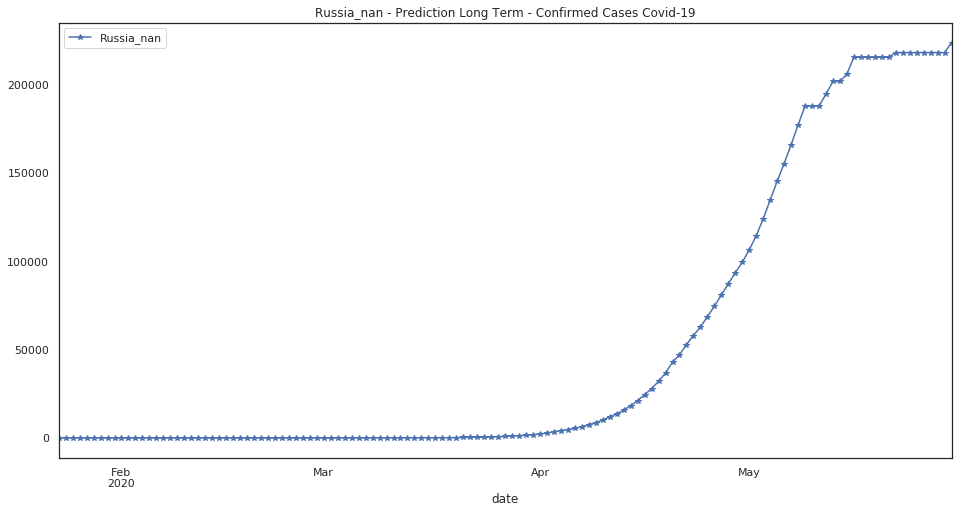

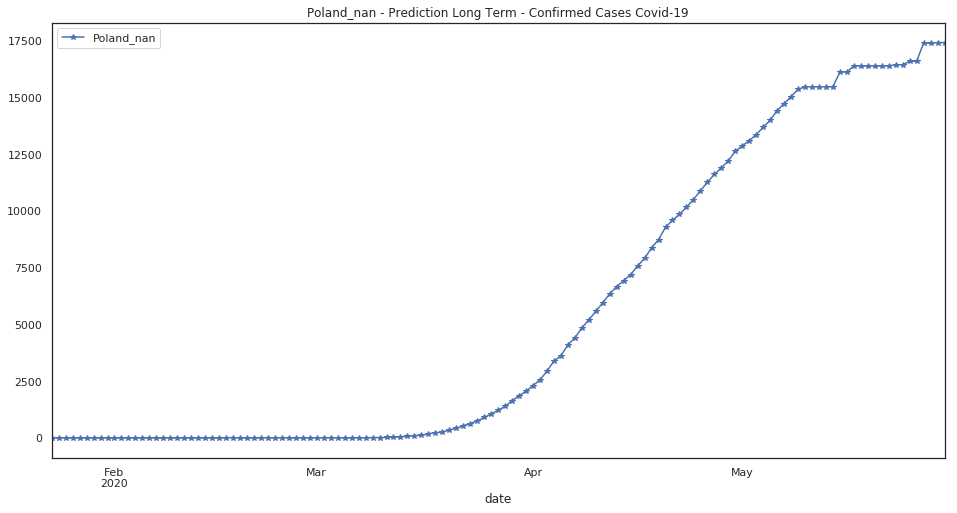

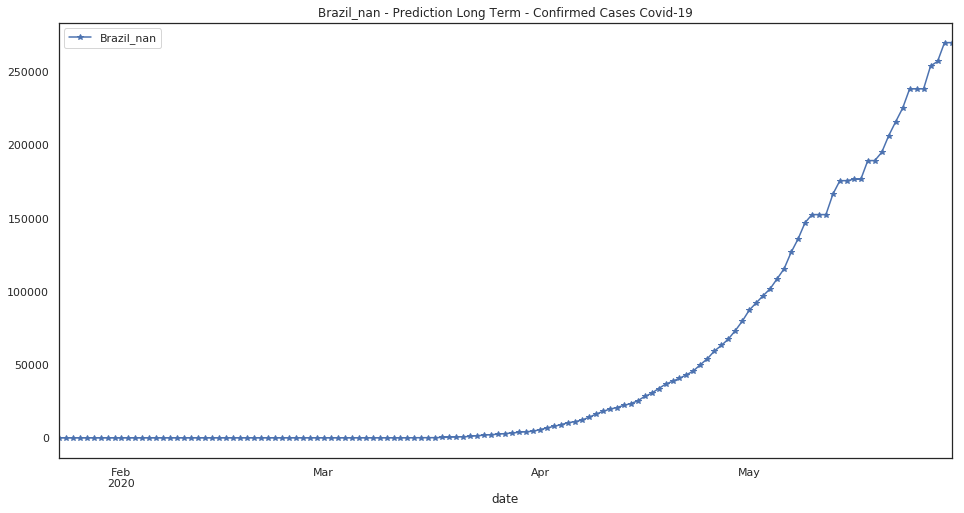

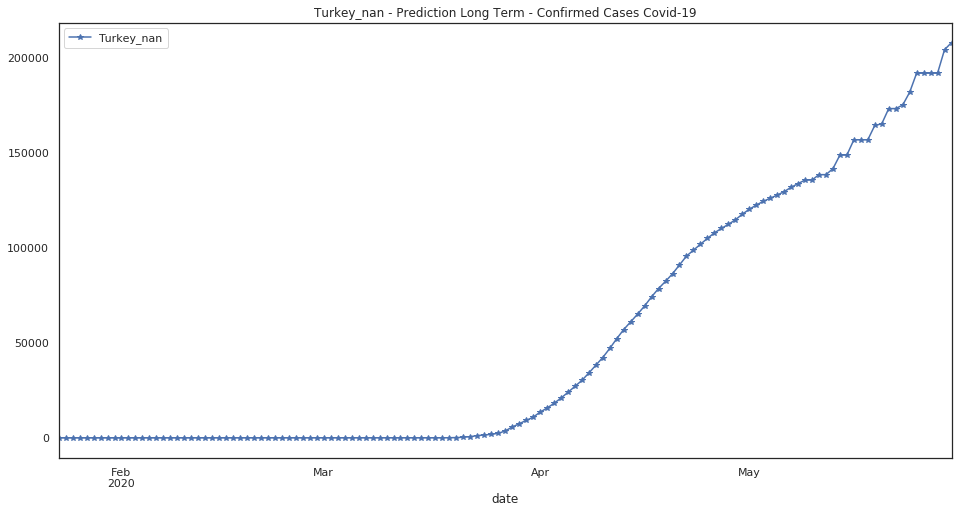

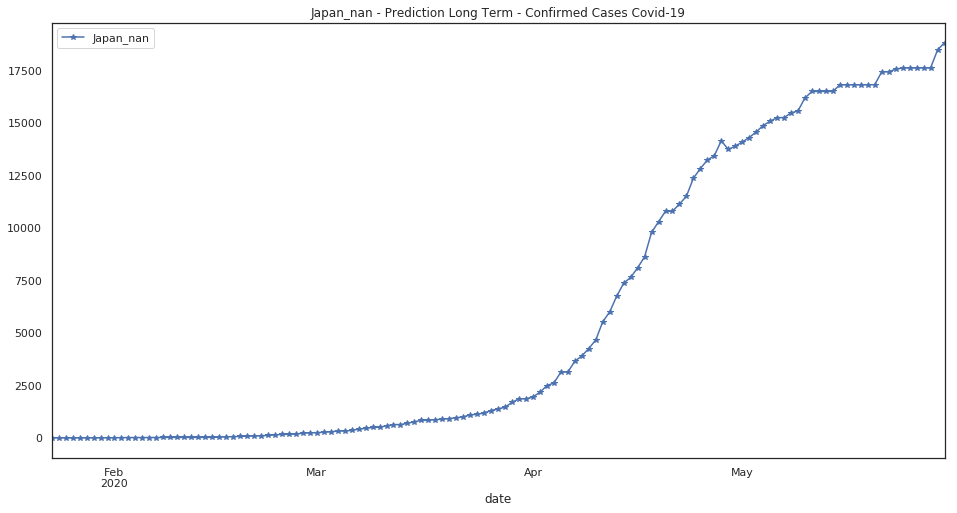

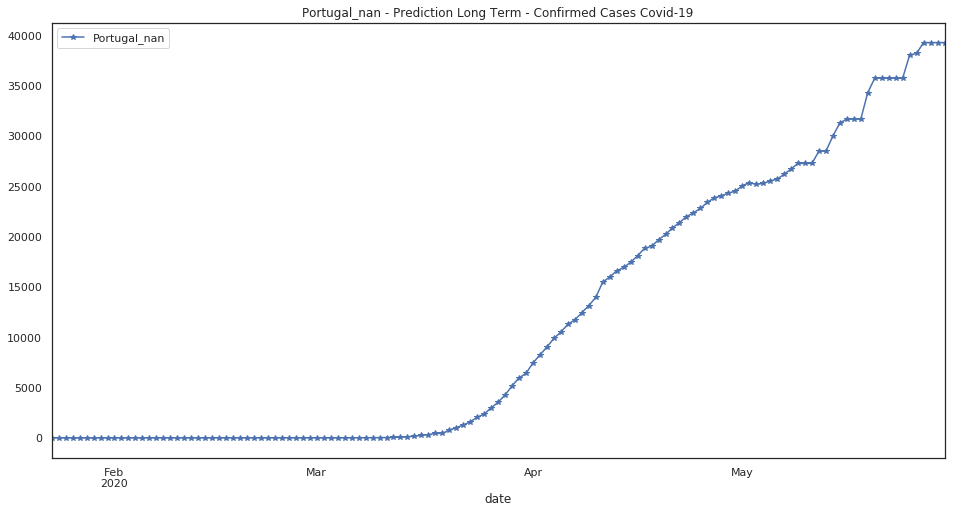

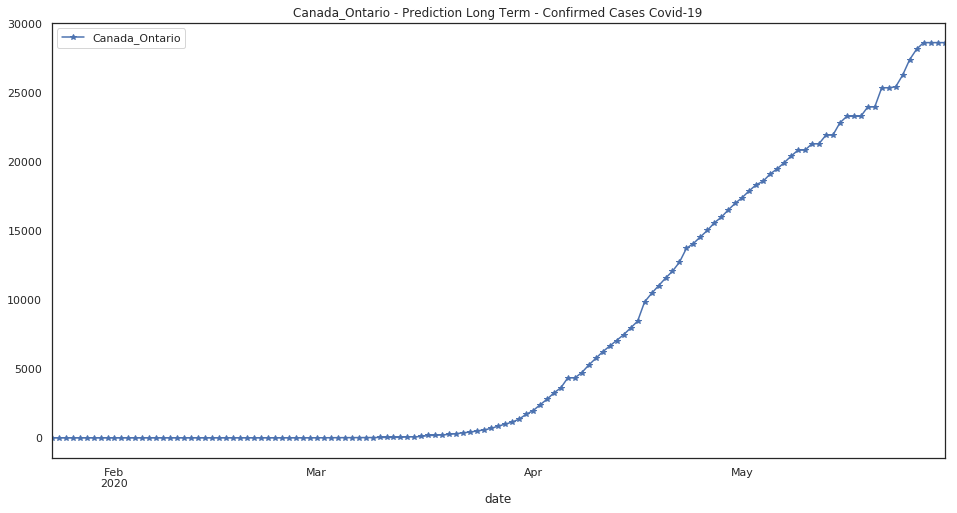

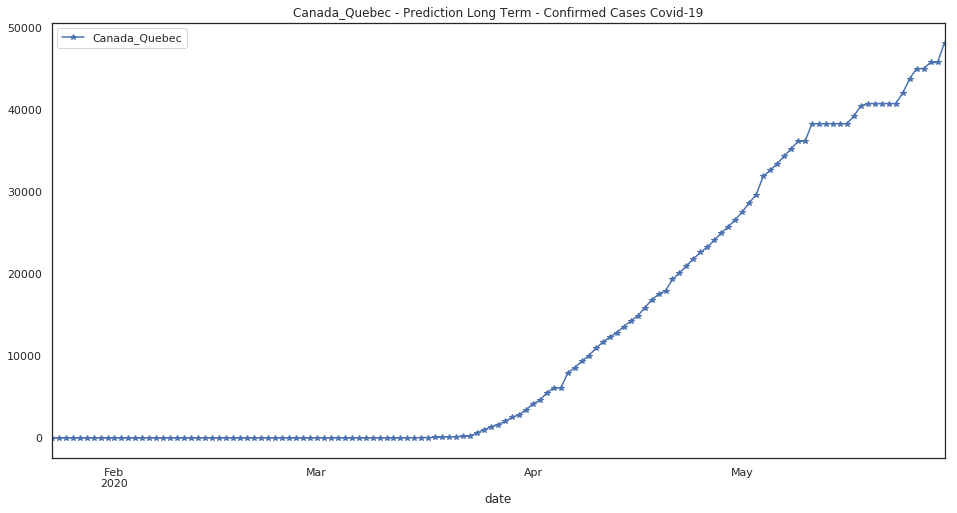

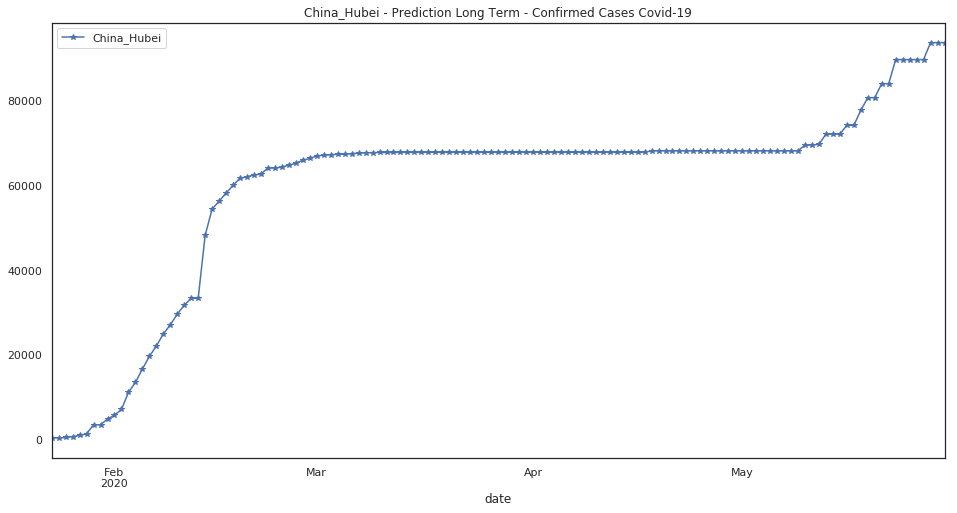

In [69]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[1:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

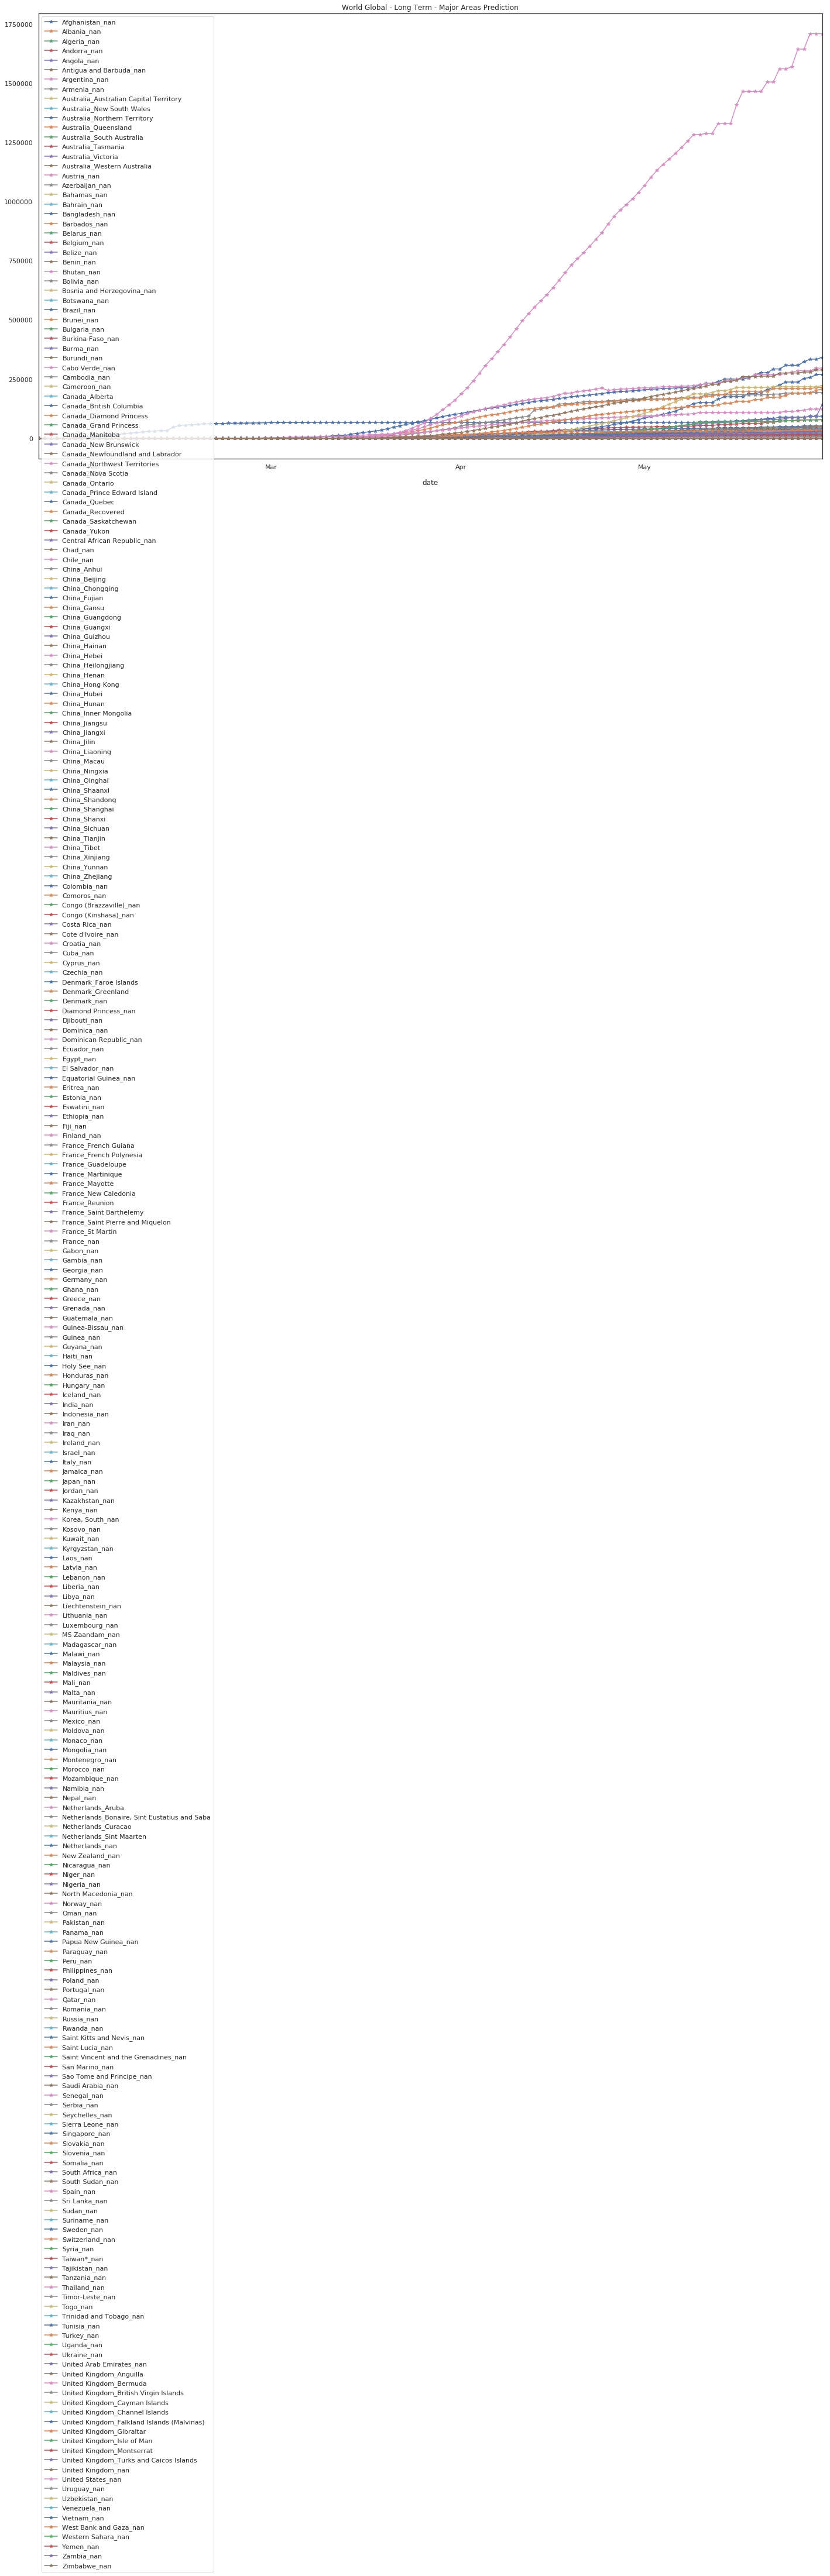

In [70]:
#region=my_train_list
pv2=pred
pv2[1:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [71]:
pv1=pv2[1:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [72]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-08              1.0          0.0         17.0          1.0   
2020-03-09              4.0          0.0         19.0          1.0   
2020-03-10              4.0          2.0         20.0          1.0   
2020-03-11              5.0         10.0         20.0          1.0   
2020-03-12              7.0         12.0         20.0          1.0   
2020-03-13              7.0         23.0         24.0          1.0   
2020-03-14              7.0         33.0         26.0          1.0   
2020-03-15             11.0         38.0         37.0          1.0   
2020-03-16             16.0         42.0         48.0          1.0   
2020-03-17             21.0         51.0         54.0          2.0   
2020-03-18             22.0         55.0         60.0         39.0   
2020-03-19             22.0         59.0         74.0         39.0   
2020-03-20             22.0         64.0         87.0         53.0   
2020-03-21             24.0         70.0         90.0         75.0   
2020-03-22             24.0         76.0        139.0         88.0   
2020-03-23             40.0         89.0        201.0        113.0   
2020-03-24             40.0        104.0        230.0        133.0   
2020-03-25             74.0        123.0        264.0        164.0   
2020-03-26             84.0        146.0        302.0        188.0   
2020-03-27             94.0        174.0        367.0        224.0   
2020-03-28            110.0        186.0        409.0        267.0   
2020-03-29            110.0        197.0        454.0        308.0   
2020-03-30            120.0        212.0        511.0        334.0   
2020-03-31            170.0        223.0        584.0        370.0   
2020-04-01            174.0        243.0        716.0        376.0   
2020-04-02            237.0        259.0        847.0        390.0   
2020-04-03            273.0        277.0        986.0        428.0   
2020-04-04            281.0        304.0       1171.0        439.0   
2020-04-05            299.0        333.0       1251.0        466.0   
2020-04-06            349.0        361.0       1320.0        501.0   
...                     ...          ...          ...          ...   
2020-05-01           2171.0        773.0       4006.0        745.0   
2020-05-02           2335.0        782.0       4154.0        745.0   
2020-05-03           2469.0        789.0       4295.0        747.0   
2020-05-04           2704.0        795.0       4474.0        748.0   
2020-05-05           2894.0        803.0       4648.0        750.0   
2020-05-06           3224.0        820.0       4838.0        751.0   
2020-05-07           3392.0        832.0       4997.0        751.0   
2020-05-08           3563.0        842.0       5182.0        752.0   
2020-05-09           3778.0        850.0       5369.0        752.0   
2020-05-10           4045.0        850.0       5420.0        752.0   
2020-05-11           4173.0        850.0       5420.0        752.0   
2020-05-12           4581.0        850.0       5919.0        752.0   
2020-05-13           4581.0        850.0       5919.0        752.0   
2020-05-14           4652.0        850.0       5919.0        755.0   
2020-05-15           5193.0        850.0       6350.0        755.0   
2020-05-16           5304.0        850.0       6463.0        755.0   
2020-05-17           5466.0        850.0       6616.0        755.0   
2020-05-18           5901.0        852.0       6616.0        755.0   
2020-05-19           5901.0        852.0       7156.0        755.0   
2020-05-20           5901.0        852.0       7156.0        755.0   
2020-05-21           6254.0        875.0       7292.0        755.0   
2020-05-22           6453.0        875.0       7326.0        786.0   
2020-05-23           6933.0        875.0       7377.0        786.0   
2020-05-24           7019.0        875.0       7377.0        808.0   
2020-05-25

In [73]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [74]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [75]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [76]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                              Canada_Recovered   0.000000    0.000000   
241                                      Laos_nan  19.856270  102.495496   
242                                     Libya_nan  26.335100   17.228331   
243                        West Bank and Gaza_nan  31.952200   35.233200   
244                             Guinea-Bissau_nan  11.803700  -15.180400   
245                                      Mali_nan  17.570692   -3.996166   
246                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
247                  Canada_Northwest Territories  64.825500 -124.845700   
248                                  Canada_Yukon  64.282300 -135.000000   
249                                    Kosovo_nan  42.602636   20.902977   
250                                     Burma_nan  21.916200   95.956000   
251                       United Kingdom_Anguilla  18.220600  -63.068600   
252         United Kingdom_British Virgin Islands  18.420700  -64.640000   
253       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
254                                MS Zaandam_nan   0.000000    0.000000   
255                                  Botswana_nan -22.328500   24.684900   
256                                   Burundi_nan  -3.373100   29.918900   
257                              Sierra Leone_nan   8.460555  -11.779889   
258  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
259            

In [77]:
#!pip install folium
import folium
import re

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat,lng,num,totpred in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]),sum(heatmap_m[heatmap_m.columns[3]] , heatmap_m[heatmap_m.columns[-1]] )):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' pred_confirmed='+str(round(totpred))+' date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [78]:
#
region_m2=region + ['Andorra_nan','Monaco_nan','San Marino_nan','Ireland_nan','Slovenia_nan','Slovakia_nan',
                    'Hungary_nan','Ukraine_nan','Croatia_nan','Finland_nan','Norway_nan','Estonia_nan','Denmark_nan',
                    'Chile_nan','Argentina_nan','Mexico_nan','Ecuador_nan','Peru_nan','Colombia_nan','Costa Rica_nan',
                    'South Africa_nan','Morocco_nan','Algeria_nan','Saudi Arabia_nan','Israel_nan','Japan_nan',
                    'Singapore_nan']
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                     region      Lat      Long  2020-01-23 00:00:00  \
0       2                Algeria_nan  28.0339    1.6596                  0.0   
1       3                Andorra_nan  42.5063    1.5218                  0.0   
2       6              Argentina_nan -38.4161  -63.6167                  0.0   
3       9  Australia_New South Wales -33.8688  151.2093                  0.0   
4      23                Belgium_nan  50.8333    4.0000                  0.0   
5      28                 Brazil_nan -14.2350  -51.9253                  0.0   
6      42             Canada_Ontario  51.2538  -85.3232                  0.0   
7      44              Canada_Quebec  52.9399  -73.5491                  0.0   
8      48                  Chile_nan -35.6751  -71.5430                  0.0   
9      61            China_Hong Kong  22.3000  114.2000                  0.0   
10     62                China_Hubei  30.9756  112.2707                444.0   
11     69                China_Macau  22.1667  113.5500                  1.0   
12     82               Colombia_nan   4.5709  -74.2973                  0.0   
13     85             Costa Rica_nan   9.7489  -83.7534                  0.0   
14     87                Croatia_nan  45.1000   15.2000                  0.0   
15     94                Denmark_nan  56.2639    9.5018                  0.0   
16     97                Ecuador_nan  -1.8312  -78.1834                  0.0   
17    102                Estonia_nan  58.5953   25.0136                  0.0   
18    106                Finland_nan  64.0000   26.0000                  0.0   
19    116                 France_nan  46.2276    2.2137                 12.0   
20    121                Germany_nan  51.0000    9.0000                  3.0   
21    130                Hungary_nan  47.1625   19.5033                  0.0   
22    132                  India_nan  21.0000   78.0000                 32.0   
23    134                   Iran_nan  32.0000   53.0000                  0.0   
24    136                Ireland_nan  53.1424   -7.6921                  0.0   
25    137                 Israel_nan  31.0000   35.0000                  0.0   
26    138                  Italy_nan  43.0000   12.0000                 20.0   
27    140                  Japan_nan  36.0000  138.0000                  5.0   
28    144           Korea, South_nan  36.0000  128.0000                 10.0   
29    160                 Mexico_nan  23.6345 -102.5528                  0.0   
30    162                 Monaco_nan  43.7333    7.4167                  0.0   
31    165                Morocco_nan  31.7917   -7.0926                  0.0   
32    171            Netherlands_nan  52.1326    5.2913                  0.0   
33    177                 Norway_nan  60.4720    8.4689                  0.0   
34    183                   Peru_nan  -9.1900  -75.0152                  0.0   
35    185                 Poland_nan  51.9194   19.1451                  0.0   
36    186               Portugal_nan  39.3999   -8.2245                  0.0   
37    189                 Russia_nan  60.0000   90.0000                  3.0   
38    193             San Marino_nan  43.9424   12.4578                  0.0   
39    194           Saudi Arabia_nan  24.0000   45.0000                  0.0   
40    198              Singapore_nan   1.2833  103.8333                  0.0   
41    199               Slovakia_nan  48.6690   19.6990                  0.0   
42    200               Slovenia_nan  46.1512   14.9955                  0.0   
43    202           South Africa_nan -30.5595   22.9375                  0.0   
44    203                  Spain_nan  40.0000   -4.0000                  3.0   
45    207                 Sweden_nan  63.0000   16.0000                  0.0   
46    208            Switzerland_nan  46.8182    8.2275                  0.0   
47    209                Taiwan*_nan  23.7000  121.0000                  1.0   
48    215                 Turkey_nan  38.9637   35.2433                  0.0   
49  

In [79]:
import folium
import re

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat2,lng2,num2,totpred2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]),sum(heatmap_m2[heatmap_m2.columns[3]] , heatmap_m2[heatmap_m2.columns[-1]] )):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' pred_confirmed='+str(round(totpred2))+' date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [80]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [81]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [82]:
exit()